In [1]:
# unzipping data file
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: HRSS_anomalous_optimized.csv  
  inflating: HRSS_anomalous_standard.csv  
  inflating: HRSS_normal_optimized.csv  
  inflating: HRSS_normal_standard.csv  


In [88]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Data
HRSSAnomalousOptimised = pd.read_csv('/content/HRSS_anomalous_optimized.csv')
HRSSNormalOptimised = pd.read_csv('/content/HRSS_normal_optimized.csv')
HRSSAnomalousStandard = pd.read_csv('/content/HRSS_anomalous_standard.csv')
HRSSNormalStandard = pd.read_csv('/content/HRSS_normal_standard.csv')

In [4]:
# Data Info about HRSSAnomalousOptimised
HRSSAnomalousOptimised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19634 entries, 0 to 19633
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        19634 non-null  float64
 1   Labels           19634 non-null  int64  
 2   I_w_BLO_Weg      19634 non-null  float64
 3   O_w_BLO_power    19634 non-null  float64
 4   O_w_BLO_voltage  19634 non-null  float64
 5   I_w_BHL_Weg      19634 non-null  float64
 6   O_w_BHL_power    19634 non-null  float64
 7   O_w_BHL_voltage  19634 non-null  float64
 8   I_w_BHR_Weg      19634 non-null  float64
 9   O_w_BHR_power    19634 non-null  float64
 10  O_w_BHR_voltage  19634 non-null  float64
 11  I_w_BRU_Weg      19634 non-null  float64
 12  O_w_BRU_power    19634 non-null  float64
 13  O_w_BRU_voltage  19634 non-null  float64
 14  I_w_HR_Weg       19634 non-null  float64
 15  O_w_HR_power     19634 non-null  float64
 16  O_w_HR_voltage   19634 non-null  float64
 17  I_w_HL_Weg  

In [5]:
# Head about HRSSAnomalousOptimised
HRSSAnomalousOptimised.head()

Timestamp  Labels  I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
0   0.000000       0          7.0            0.0              0.0   
1   0.043999       0          7.0            0.0              0.0   
2   0.099998       0          7.0            0.0              0.0   
3   0.143997       0          7.0            0.0              0.0   
4   0.249001       0          7.0            0.0              0.0   

   I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  I_w_BHR_Weg  O_w_BHR_power  \
0       -547.0            0.0              0.0       -874.0           12.0   
1       -547.0            0.0              0.0       -874.0           12.0   
2       -547.0            0.0              0.0       -874.0           12.0   
3       -547.0            0.0              0.0       -874.0           12.0   
4       -547.0            0.0              0.0       -874.0            7.0   

   O_w_BHR_voltage  I_w_BRU_Weg  O_w_BRU_power  O_w_BRU_voltage  I_w_HR_Weg  \
0              1.0        -32.0            0.0              0.0         0.0   
1              1.0        -32.0            0.0              0.0         0.0   
2              1.0        -32.0            0.0              0.0         0.0   
3              1.0        -32.0            0.0              0.0         0.0   
4              1.0         22.0        18471.0             47.0         0.0   

   O_w_HR_power  O_w_HR_voltage  I_w_HL_Weg  O_w_HL_power  O_w_HL_voltage  
0        2560.0            24.0         0.0        3434.0            24.0  
1        2560.0            24.0         0.0        3434.0            24.0  
2        2560.0            24.0         0.0        3434.0            24.0  
3        2560.0            24.0         0.0        3434.0            24.0  
4        5764.0            26.0         0.0        5008.0            24.0

In [6]:
# Tail about HRSSAnomalousOptimised
HRSSAnomalousOptimised.tail()

Timestamp  Labels  I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
19629  11.634995       0       -105.0            0.0              0.0   
19630  11.751999       0       -105.0            0.0              0.0   
19631  11.795998       0       -105.0            0.0              0.0   
19632  11.883995       0       -105.0            0.0              0.0   
19633  11.931999       0       -105.0            0.0              0.0   

       I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  I_w_BHR_Weg  \
19629          0.0            0.0              0.0      -1250.0   
19630          0.0            0.0              0.0      -1250.0   
19631          0.0            0.0              0.0      -1250.0   
19632          0.0            0.0              0.0      -1250.0   
19633          0.0            0.0              0.0      -1250.0   

       O_w_BHR_power  O_w_BHR_voltage  I_w_BRU_Weg  O_w_BRU_power  \
19629            0.0              0.0       -528.0        19012.0   
19630            0.0              0.0       -528.0        19012.0   
19631            0.0              0.0       -598.0        15557.0   
19632            0.0              0.0       -598.0        15557.0   
19633            0.0              0.0       -598.0        15557.0   

       O_w_BRU_voltage  I_w_HR_Weg  O_w_HR_power  O_w_HR_voltage  I_w_HL_Weg  \
19629             50.0         0.0        8312.0            26.0         0.0   
19630             50.0         0.0        8312.0            26.0         0.0   
19631             46.0         0.0        9190.0            27.0         0.0   
19632             46.0         0.0        9190.0            27.0         0.0   
19633             46.0         0.0        9190.0            27.0         0.0   

       O_w_HL_power  O_w_HL_voltage  
19629       11484.0            26.0  
19630       11484.0            26.0  
19631       13186.0            26.0  
19632       13186.0            26.0  
19633       13186.0            26.0

In [7]:
# Describe about HRSSAnomalousOptimised
HRSSAnomalousOptimised.describe()

Timestamp        Labels   I_w_BLO_Weg  O_w_BLO_power  \
count  19634.000000  19634.000000  19634.000000   19634.000000   
mean       5.767927      0.230060     40.703487    5303.031410   
std        3.490094      0.420882    166.858246    8352.083127   
min        0.000000      0.000000   -304.263574     -82.014058   
25%        2.741247      0.000000   -105.000000       0.000000   
50%        5.626499      0.000000      8.000000       0.000000   
75%        8.700754      0.000000     58.000000   13646.250000   
max       14.246002      1.000000   1011.098251   30140.000000   

       O_w_BLO_voltage   I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  \
count     19634.000000  19634.000000   19634.000000     19634.000000   
mean         14.392784     47.688045    4233.468952        21.583919   
std          21.644442    590.372153    7480.303413        35.395885   
min           0.000000   -895.200000   -8990.990827       -43.869886   
25%           0.000000   -546.000000       0.000000         0.000000   
50%           0.000000      0.000000      20.000000         1.000000   
75%          41.000000    713.000000    6994.000000        47.000000   
max          60.000000   1130.400000   39838.352278       105.000000   

        I_w_BHR_Weg  O_w_BHR_power  O_w_BHR_voltage   I_w_BRU_Weg  \
count  19634.000000   19634.000000     19634.000000  19634.000000   
mean       2.706957    4533.481177        25.681302    367.114574   
std      808.309692    7334.904588        36.312593    336.241930   
min    -1322.000000    -241.090909        -0.954545   -855.000000   
25%     -874.000000       0.000000         0.000000    225.250000   
50%      233.500000      12.000000         1.000000    565.000000   
75%      781.000000    8968.000000        49.000000    566.000000   
max     1015.300000   41507.700000       119.600000    755.851233   

       O_w_BRU_power  O_w_BRU_voltage    I_w_HR_Weg  O_w_HR_power  \
count   19634.000000     19634.000000  19634.000000  19634.000000   
mean     6403.849753        16.952684   -403.427850  11624.884579   
std      9209.345642        23.360408    386.470623   6582.069616   
min         0.000000         0.000000   -833.000000      0.000000   
25%         0.000000         0.000000   -833.000000   7168.000000   
50%         9.000000         1.000000   -357.000000  10216.000000   
75%     17297.000000        49.000000      0.000000  14455.000000   
max     35008.471074        72.800000      0.000000  39060.793388   

       O_w_HR_voltage    I_w_HL_Weg  O_w_HL_power  O_w_HL_voltage  
count    19634.000000  19634.000000  19634.000000    19634.000000  
mean        53.859209   -404.484078  12438.703120       53.695317  
std         58.955121    389.230227   7597.929198       59.057735  
min          0.000000  -1151.203780      0.000000        0.000000  
25%         26.000000   -833.000000   6232.000000       24.000000  
50%         27.000000   -340.000000  11593.000000       27.000000  
75%         29.000000      0.000000  15923.000000       32.000000  
max        280.000000    186.850225  41940.600000      279.000000

In [8]:
# Checking Null Values about HRSSAnomalousOptimised
HRSSAnomalousOptimised.isnull().sum()

Timestamp          0
Labels             0
I_w_BLO_Weg        0
O_w_BLO_power      0
O_w_BLO_voltage    0
I_w_BHL_Weg        0
O_w_BHL_power      0
O_w_BHL_voltage    0
I_w_BHR_Weg        0
O_w_BHR_power      0
O_w_BHR_voltage    0
I_w_BRU_Weg        0
O_w_BRU_power      0
O_w_BRU_voltage    0
I_w_HR_Weg         0
O_w_HR_power       0
O_w_HR_voltage     0
I_w_HL_Weg         0
O_w_HL_power       0
O_w_HL_voltage     0
dtype: int64

In [9]:
# Columns about HRSSAnomalousOptimised
HRSSAnomalousOptimised.columns

Index(['Timestamp', 'Labels', 'I_w_BLO_Weg', 'O_w_BLO_power',
       'O_w_BLO_voltage', 'I_w_BHL_Weg', 'O_w_BHL_power', 'O_w_BHL_voltage',
       'I_w_BHR_Weg', 'O_w_BHR_power', 'O_w_BHR_voltage', 'I_w_BRU_Weg',
       'O_w_BRU_power', 'O_w_BRU_voltage', 'I_w_HR_Weg', 'O_w_HR_power',
       'O_w_HR_voltage', 'I_w_HL_Weg', 'O_w_HL_power', 'O_w_HL_voltage'],
      dtype='object')

In [10]:
# Outliers about HRSSAnomalousOptimised
Q1 = HRSSAnomalousOptimised.quantile(0.25)
Q3 = HRSSAnomalousOptimised.quantile(0.75)
IQR = Q3 - Q1
outliers = ((HRSSAnomalousOptimised < (Q1 - 1.5 * IQR)) | (HRSSAnomalousOptimised > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Timestamp             0
Labels             4517
I_w_BLO_Weg        2340
O_w_BLO_power         0
O_w_BLO_voltage       0
I_w_BHL_Weg           0
O_w_BHL_power      1706
O_w_BHL_voltage       0
I_w_BHR_Weg           0
O_w_BHR_power       522
O_w_BHR_voltage       0
I_w_BRU_Weg        1634
O_w_BRU_power         0
O_w_BRU_voltage       0
I_w_HR_Weg            0
O_w_HR_power       1161
O_w_HR_voltage     5274
I_w_HL_Weg            0
O_w_HL_power        501
O_w_HL_voltage     4827
dtype: int64


In [11]:
# Data Info about HRSSNormalOptimised
HRSSNormalOptimised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21329 entries, 0 to 21328
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        21329 non-null  float64
 1   Labels           21329 non-null  int64  
 2   I_w_BLO_Weg      21329 non-null  int64  
 3   O_w_BLO_power    21329 non-null  int64  
 4   O_w_BLO_voltage  21329 non-null  int64  
 5   I_w_BHL_Weg      21329 non-null  int64  
 6   O_w_BHL_power    21329 non-null  int64  
 7   O_w_BHL_voltage  21329 non-null  int64  
 8   I_w_BHR_Weg      21329 non-null  int64  
 9   O_w_BHR_power    21329 non-null  int64  
 10  O_w_BHR_voltage  21329 non-null  int64  
 11  I_w_BRU_Weg      21329 non-null  int64  
 12  O_w_BRU_power    21329 non-null  int64  
 13  O_w_BRU_voltage  21329 non-null  int64  
 14  I_w_HR_Weg       21329 non-null  int64  
 15  O_w_HR_power     21329 non-null  int64  
 16  O_w_HR_voltage   21329 non-null  int64  
 17  I_w_HL_Weg  

In [12]:
# Head about HRSSNormalOptimised
HRSSNormalOptimised.head()

Timestamp  Labels  I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
0   0.000000       0            7              0                0   
1   0.043999       0            7              0                0   
2   0.099998       0            7              0                0   
3   0.143997       0            7              0                0   
4   0.249001       0            7              0                0   

   I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  I_w_BHR_Weg  O_w_BHR_power  \
0         -547              0                0         -874             12   
1         -547              0                0         -874             12   
2         -547              0                0         -874             12   
3         -547              0                0         -874             12   
4         -547              0                0         -874              7   

   O_w_BHR_voltage  I_w_BRU_Weg  O_w_BRU_power  O_w_BRU_voltage  I_w_HR_Weg  \
0                1          -32              0                0           0   
1                1          -32              0                0           0   
2                1          -32              0                0           0   
3                1          -32              0                0           0   
4                1           22          18471               47           0   

   O_w_HR_power  O_w_HR_voltage  I_w_HL_Weg  O_w_HL_power  O_w_HL_voltage  
0          2560              24           0          3434              24  
1          2560              24           0          3434              24  
2          2560              24           0          3434              24  
3          2560              24           0          3434              24  
4          5764              26           0          5008              24

In [13]:
# Tail about HRSSNormalOptimised
HRSSNormalOptimised.tail()

Timestamp  Labels  I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
21324  11.634995       0         -105              0                0   
21325  11.751999       0         -105              0                0   
21326  11.795998       0         -105              0                0   
21327  11.883995       0         -105              0                0   
21328  11.931999       0         -105              0                0   

       I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  I_w_BHR_Weg  \
21324            0              0                0        -1250   
21325            0              0                0        -1250   
21326            0              0                0        -1250   
21327            0              0                0        -1250   
21328            0              0                0        -1250   

       O_w_BHR_power  O_w_BHR_voltage  I_w_BRU_Weg  O_w_BRU_power  \
21324              0                0         -528          19012   
21325              0                0         -528          19012   
21326              0                0         -598          15557   
21327              0                0         -598          15557   
21328              0                0         -598          15557   

       O_w_BRU_voltage  I_w_HR_Weg  O_w_HR_power  O_w_HR_voltage  I_w_HL_Weg  \
21324               50           0          8312              26           0   
21325               50           0          8312              26           0   
21326               46           0          9190              27           0   
21327               46           0          9190              27           0   
21328               46           0          9190              27           0   

       O_w_HL_power  O_w_HL_voltage  
21324         11484              26  
21325         11484              26  
21326         13186              26  
21327         13186              26  
21328         13186              26

In [14]:
# Describe about HRSSNormalOptimised
HRSSNormalOptimised.describe()

Timestamp   Labels   I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
count  21329.000000  21329.0  21329.000000   21329.000000     21329.000000   
mean       5.959018      0.0     39.051292    5422.117774        14.720990   
std        3.461511      0.0    167.466005    8393.010635        21.791105   
min        0.000000      0.0   -110.000000       0.000000         0.000000   
25%        2.959000      0.0   -105.000000       0.000000         0.000000   
50%        5.958000      0.0      8.000000       0.000000         0.000000   
75%        8.954002      0.0     60.000000   14432.000000        44.000000   
max       12.737999      0.0    494.000000   30140.000000        56.000000   

        I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage   I_w_BHR_Weg  \
count  21329.000000   21329.000000     21329.000000  21329.000000   
mean      55.994561    4160.884523        21.438183     -8.842093   
std      584.831442    7286.211604        35.162714    819.272830   
min     -748.000000       0.000000         0.000000  -1322.000000   
25%     -546.000000       0.000000         0.000000   -874.000000   
50%        0.000000      27.000000         1.000000    231.000000   
75%      716.000000    6963.000000        47.000000    781.000000   
max      995.000000   32648.000000       105.000000    784.000000   

       O_w_BHR_power  O_w_BHR_voltage   I_w_BRU_Weg  O_w_BRU_power  \
count   21329.000000     21329.000000  21329.000000   21329.000000   
mean     4488.586057        25.304562    357.592198    6512.665245   
std      7274.067588        36.071115    345.458611    9269.816507   
min         0.000000         0.000000   -855.000000       0.000000   
25%         0.000000         0.000000    189.000000       0.000000   
50%        12.000000         1.000000    565.000000       9.000000   
75%      8592.000000        49.000000    566.000000   17444.000000   
max     32752.000000       103.000000    575.000000   31845.000000   

       O_w_BRU_voltage    I_w_HR_Weg  O_w_HR_power  O_w_HR_voltage  \
count     21329.000000  21329.000000  21329.000000    21329.000000   
mean         17.183553   -404.841812  11526.515214       52.990858   
std          23.449834    389.214602   6498.801117       58.076441   
min           0.000000   -833.000000      0.000000        0.000000   
25%           0.000000   -833.000000   7168.000000       26.000000   
50%           1.000000   -335.000000  10028.000000       27.000000   
75%          49.000000      0.000000  14374.000000       29.000000   
max          58.000000      0.000000  32760.000000      280.000000   

         I_w_HL_Weg  O_w_HL_power  O_w_HL_voltage  
count  21329.000000   21329.00000    21329.000000  
mean    -404.843875   12510.63838       52.809086  
std      389.213421    7383.12065       58.112581  
min     -833.000000       0.00000        0.000000  
25%     -833.000000    6648.00000       26.000000  
50%     -337.000000   11822.00000       26.000000  
75%        0.000000   15787.00000       31.000000  
max        0.000000   32758.00000      279.000000

In [15]:
# Checking Null Values about HRSSNormalOptimised
HRSSNormalOptimised.isnull().sum()

Timestamp          0
Labels             0
I_w_BLO_Weg        0
O_w_BLO_power      0
O_w_BLO_voltage    0
I_w_BHL_Weg        0
O_w_BHL_power      0
O_w_BHL_voltage    0
I_w_BHR_Weg        0
O_w_BHR_power      0
O_w_BHR_voltage    0
I_w_BRU_Weg        0
O_w_BRU_power      0
O_w_BRU_voltage    0
I_w_HR_Weg         0
O_w_HR_power       0
O_w_HR_voltage     0
I_w_HL_Weg         0
O_w_HL_power       0
O_w_HL_voltage     0
dtype: int64

In [16]:
# Columns about HRSSNormalOptimised
HRSSNormalOptimised.columns

Index(['Timestamp', 'Labels', 'I_w_BLO_Weg', 'O_w_BLO_power',
       'O_w_BLO_voltage', 'I_w_BHL_Weg', 'O_w_BHL_power', 'O_w_BHL_voltage',
       'I_w_BHR_Weg', 'O_w_BHR_power', 'O_w_BHR_voltage', 'I_w_BRU_Weg',
       'O_w_BRU_power', 'O_w_BRU_voltage', 'I_w_HR_Weg', 'O_w_HR_power',
       'O_w_HR_voltage', 'I_w_HL_Weg', 'O_w_HL_power', 'O_w_HL_voltage'],
      dtype='object')

In [17]:
# Outliers about HRSSNormalOptimised
Q1 = HRSSNormalOptimised.quantile(0.25)
Q3 = HRSSNormalOptimised.quantile(0.75)
IQR = Q3 - Q1
outliers = ((HRSSNormalOptimised < (Q1 - 1.5 * IQR)) | (HRSSNormalOptimised > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Timestamp             0
Labels                0
I_w_BLO_Weg        2497
O_w_BLO_power         0
O_w_BLO_voltage       0
I_w_BHL_Weg           0
O_w_BHL_power      1806
O_w_BHL_voltage       0
I_w_BHR_Weg           0
O_w_BHR_power       603
O_w_BHR_voltage       0
I_w_BRU_Weg        1457
O_w_BRU_power         0
O_w_BRU_voltage       0
I_w_HR_Weg            0
O_w_HR_power       1293
O_w_HR_voltage     5483
I_w_HL_Weg            0
O_w_HL_power        769
O_w_HL_voltage     5324
dtype: int64


In [18]:
# Data Info about HRSSAnomalousStandard
HRSSAnomalousStandard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23645 entries, 0 to 23644
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        23645 non-null  float64
 1   Labels           23645 non-null  int64  
 2   I_w_BLO_Weg      23645 non-null  float64
 3   O_w_BLO_power    23645 non-null  float64
 4   O_w_BLO_voltage  23645 non-null  float64
 5   I_w_BHL_Weg      23645 non-null  float64
 6   O_w_BHL_power    23645 non-null  float64
 7   O_w_BHL_voltage  23645 non-null  float64
 8   I_w_BHR_Weg      23645 non-null  float64
 9   O_w_BHR_power    23645 non-null  float64
 10  O_w_BHR_voltage  23645 non-null  float64
 11  I_w_BRU_Weg      23645 non-null  float64
 12  O_w_BRU_power    23645 non-null  float64
 13  O_w_BRU_voltage  23645 non-null  float64
 14  I_w_HR_Weg       23645 non-null  float64
 15  O_w_HR_power     23645 non-null  float64
 16  O_w_HR_voltage   23645 non-null  float64
 17  I_w_HL_Weg  

In [19]:
# Head about HRSSAnomalousStandard
HRSSAnomalousStandard.head()

Timestamp  Labels  I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
0   0.000000       0       -107.0            0.0              0.0   
1   0.045998       0       -107.0            0.0              0.0   
2   0.151001       0       -107.0            0.0              0.0   
3   0.206001       0       -107.0            0.0              0.0   
4   0.264000       0       -107.0            0.0              0.0   

   I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  I_w_BHR_Weg  O_w_BHR_power  \
0          0.0            0.0              0.0      -1268.0            0.0   
1          0.0            0.0              0.0      -1268.0            0.0   
2          0.0            0.0              0.0      -1268.0            0.0   
3          0.0            0.0              0.0      -1268.0            0.0   
4          0.0            0.0              0.0      -1268.0            0.0   

   O_w_BHR_voltage  I_w_BRU_Weg  O_w_BRU_power  O_w_BRU_voltage  I_w_HR_Weg  \
0              0.0        -26.0           84.0             11.0         0.0   
1              0.0        -26.0           84.0             11.0         0.0   
2              0.0        -26.0           84.0             11.0         0.0   
3              0.0         29.0        21725.0             54.0         0.0   
4              0.0         29.0        21725.0             54.0         0.0   

   O_w_HR_power  O_w_HR_voltage  I_w_HL_Weg  O_w_HL_power  O_w_HL_voltage  
0        7168.0            26.0         0.0        7720.0            24.0  
1        7168.0            26.0         0.0        7720.0            24.0  
2        7168.0            26.0         0.0        7720.0            24.0  
3        6726.0            26.0         0.0       10756.0            26.0  
4        6726.0            26.0         0.0       10756.0            26.0

In [20]:
# Tail about HRSSAnomalousStandard
HRSSAnomalousStandard.tail()

Timestamp  Labels  I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
23640  14.847000       0          8.0            0.0              0.0   
23641  14.904999       0          8.0            0.0              0.0   
23642  14.960999       0          8.0            0.0              0.0   
23643  15.005997       0          8.0            0.0              0.0   
23644  15.119003       0          8.0            0.0              0.0   

       I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  I_w_BHR_Weg  \
23640       -547.0            0.0              0.0       -873.0   
23641       -547.0            0.0              0.0       -873.0   
23642       -547.0            0.0              0.0       -873.0   
23643       -547.0            0.0              0.0       -873.0   
23644       -547.0            0.0              0.0       -873.0   

       O_w_BHR_power  O_w_BHR_voltage  I_w_BRU_Weg  O_w_BRU_power  \
23640            0.0              0.0       -496.0        23655.0   
23641            0.0              0.0       -496.0        23655.0   
23642            0.0              0.0       -575.0        21670.0   
23643            0.0              0.0       -575.0        21670.0   
23644            0.0              0.0       -575.0        21670.0   

       O_w_BRU_voltage  I_w_HR_Weg  O_w_HR_power  O_w_HR_voltage  I_w_HL_Weg  \
23640             57.0         0.0        5322.0            24.0         0.0   
23641             57.0         0.0        5322.0            24.0         0.0   
23642             55.0         0.0        5504.0            24.0         0.0   
23643             55.0         0.0        5504.0            24.0         0.0   
23644             55.0         0.0        5504.0            24.0         0.0   

       O_w_HL_power  O_w_HL_voltage  
23640        5440.0            24.0  
23641        5440.0            24.0  
23642        5440.0            24.0  
23643        5440.0            24.0  
23644        5440.0            24.0

In [21]:
# Describe about HRSSAnomalousStandard
HRSSAnomalousStandard.describe()

Timestamp        Labels   I_w_BLO_Weg  O_w_BLO_power  \
count  23645.000000  23645.000000  23645.000000   23645.000000   
mean       7.300677      0.239797     41.661035    4914.980880   
std        4.428634      0.426969    196.004108    9043.178435   
min        0.000000      0.000000   -315.835527       0.000000   
25%        3.452003      0.000000   -106.000000       0.000000   
50%        7.125999      0.000000      8.000000       0.000000   
75%       10.965996      0.000000     12.000000    1155.000000   
max       18.850998      1.000000    739.200000   34817.661157   

       O_w_BLO_voltage   I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  \
count     23645.000000  23645.000000   23645.000000     23645.000000   
mean         12.753191     74.702698    6913.442087        18.260890   
std          22.636023    486.534222   10208.498133        25.297427   
min        -113.020070   -548.000000   -4314.545163       -22.110587   
25%           0.000000   -321.000000       0.000000         0.000000   
50%           0.000000      0.000000      51.957475         1.000000   
75%           9.000000    449.828171   19764.000000        55.000000   
max         179.025123   1301.892229   48719.680782        66.000000   

        I_w_BHR_Weg  O_w_BHR_power  O_w_BHR_voltage   I_w_BRU_Weg  \
count  23645.000000   23645.000000     23645.000000  23645.000000   
mean      44.644466    6040.061150        17.613077    434.868569   
std      589.168543    9001.684429        24.859090    293.779559   
min    -1322.000000       0.000000         0.000000   -661.952351   
25%     -286.000000       0.000000         0.000000    572.000000   
50%      391.000000       0.000000         0.000000    573.000000   
75%      477.000000   17172.000000        52.000000    574.000000   
max      621.400000   32536.000000        67.200000    688.800000   

       O_w_BRU_power  O_w_BRU_voltage    I_w_HR_Weg  O_w_HR_power  \
count    23645.00000     23645.000000  23645.000000  23645.000000   
mean      5089.61948        13.192041   -418.577047  11335.382423   
std       9351.12194        23.108421    406.145904   6918.885968   
min          0.00000         0.000000  -1032.199718      0.000000   
25%          0.00000         0.000000   -833.000000   6830.000000   
50%          0.00000         0.000000   -453.000000   9271.000000   
75%        270.00000         3.000000      0.000000  14158.000000   
max      32674.00000        75.400000      0.000000  42895.834711   

       O_w_HR_voltage    I_w_HL_Weg  O_w_HL_power  O_w_HL_voltage  
count    23645.000000  23645.000000  23645.000000    23645.000000  
mean        51.788190   -419.594284  13385.142842       51.769105  
std         88.631338    406.963224   8125.326471       88.373796  
min          0.000000  -1082.900000      0.000000        0.000000  
25%         26.000000   -833.000000   7408.000000       24.000000  
50%         26.000000   -460.000000  11094.000000       26.000000  
75%         29.000000      0.000000  18678.000000       29.000000  
max        543.000000    101.118012  41789.800000      596.400000

In [22]:
# Checking Null Values about HRSSAnomalousStandard
HRSSAnomalousStandard.isnull().sum()

Timestamp          0
Labels             0
I_w_BLO_Weg        0
O_w_BLO_power      0
O_w_BLO_voltage    0
I_w_BHL_Weg        0
O_w_BHL_power      0
O_w_BHL_voltage    0
I_w_BHR_Weg        0
O_w_BHR_power      0
O_w_BHR_voltage    0
I_w_BRU_Weg        0
O_w_BRU_power      0
O_w_BRU_voltage    0
I_w_HR_Weg         0
O_w_HR_power       0
O_w_HR_voltage     0
I_w_HL_Weg         0
O_w_HL_power       0
O_w_HL_voltage     0
dtype: int64

In [23]:
# Columns about HRSSAnomalousStandard
HRSSAnomalousStandard.columns

Index(['Timestamp', 'Labels', 'I_w_BLO_Weg', 'O_w_BLO_power',
       'O_w_BLO_voltage', 'I_w_BHL_Weg', 'O_w_BHL_power', 'O_w_BHL_voltage',
       'I_w_BHR_Weg', 'O_w_BHR_power', 'O_w_BHR_voltage', 'I_w_BRU_Weg',
       'O_w_BRU_power', 'O_w_BRU_voltage', 'I_w_HR_Weg', 'O_w_HR_power',
       'O_w_HR_voltage', 'I_w_HL_Weg', 'O_w_HL_power', 'O_w_HL_voltage'],
      dtype='object')

In [24]:
# Outliers about HRSSAnomalousStandard
Q1 = HRSSAnomalousStandard.quantile(0.25)
Q3 = HRSSAnomalousStandard.quantile(0.75)
IQR = Q3 - Q1
outliers = ((HRSSAnomalousStandard < (Q1 - 1.5 * IQR)) | (HRSSAnomalousStandard > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Timestamp             0
Labels             5670
I_w_BLO_Weg        4206
O_w_BLO_power      5730
O_w_BLO_voltage    5589
I_w_BHL_Weg           0
O_w_BHL_power         0
O_w_BHL_voltage       0
I_w_BHR_Weg           0
O_w_BHR_power         0
O_w_BHR_voltage       0
I_w_BRU_Weg        8603
O_w_BRU_power      5762
O_w_BRU_voltage    5766
I_w_HR_Weg            0
O_w_HR_power       1362
O_w_HR_voltage     2580
I_w_HL_Weg            0
O_w_HL_power         45
O_w_HL_voltage     2555
dtype: int64


In [25]:
# Data Info about HRSSNormalStandard
HRSSNormalStandard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25907 entries, 0 to 25906
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        25907 non-null  float64
 1   Labels           25907 non-null  int64  
 2   I_w_BLO_Weg      25907 non-null  int64  
 3   O_w_BLO_power    25907 non-null  int64  
 4   O_w_BLO_voltage  25907 non-null  int64  
 5   I_w_BHL_Weg      25907 non-null  int64  
 6   O_w_BHL_power    25907 non-null  int64  
 7   O_w_BHL_voltage  25907 non-null  int64  
 8   I_w_BHR_Weg      25907 non-null  int64  
 9   O_w_BHR_power    25907 non-null  int64  
 10  O_w_BHR_voltage  25907 non-null  int64  
 11  I_w_BRU_Weg      25907 non-null  int64  
 12  O_w_BRU_power    25907 non-null  int64  
 13  O_w_BRU_voltage  25907 non-null  int64  
 14  I_w_HR_Weg       25907 non-null  int64  
 15  O_w_HR_power     25907 non-null  int64  
 16  O_w_HR_voltage   25907 non-null  int64  
 17  I_w_HL_Weg  

In [26]:
# Head about HRSSNormalStandard
HRSSNormalStandard.head()

Timestamp  Labels  I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
0   0.000000       0         -107              0                0   
1   0.045998       0         -107              0                0   
2   0.151001       0         -107              0                0   
3   0.206001       0         -107              0                0   
4   0.264000       0         -107              0                0   

   I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  I_w_BHR_Weg  O_w_BHR_power  \
0            0              0                0        -1268              0   
1            0              0                0        -1268              0   
2            0              0                0        -1268              0   
3            0              0                0        -1268              0   
4            0              0                0        -1268              0   

   O_w_BHR_voltage  I_w_BRU_Weg  O_w_BRU_power  O_w_BRU_voltage  I_w_HR_Weg  \
0                0          -26             84               11           0   
1                0          -26             84               11           0   
2                0          -26             84               11           0   
3                0           29          21725               54           0   
4                0           29          21725               54           0   

   O_w_HR_power  O_w_HR_voltage  I_w_HL_Weg  O_w_HL_power  O_w_HL_voltage  
0          7168              26           0          7720              24  
1          7168              26           0          7720              24  
2          7168              26           0          7720              24  
3          6726              26           0         10756              26  
4          6726              26           0         10756              26

In [27]:
# Tail about HRSSNormalStandard
HRSSNormalStandard.tail()

Timestamp  Labels  I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
25902  14.847000       0            8              0                0   
25903  14.904999       0            8              0                0   
25904  14.960999       0            8              0                0   
25905  15.005997       0            8              0                0   
25906  15.119003       0            8              0                0   

       I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  I_w_BHR_Weg  \
25902         -547              0                0         -873   
25903         -547              0                0         -873   
25904         -547              0                0         -873   
25905         -547              0                0         -873   
25906         -547              0                0         -873   

       O_w_BHR_power  O_w_BHR_voltage  I_w_BRU_Weg  O_w_BRU_power  \
25902              0                0         -496          23655   
25903              0                0         -496          23655   
25904              0                0         -575          21670   
25905              0                0         -575          21670   
25906              0                0         -575          21670   

       O_w_BRU_voltage  I_w_HR_Weg  O_w_HR_power  O_w_HR_voltage  I_w_HL_Weg  \
25902               57           0          5322              24           0   
25903               57           0          5322              24           0   
25904               55           0          5504              24           0   
25905               55           0          5504              24           0   
25906               55           0          5504              24           0   

       O_w_HL_power  O_w_HL_voltage  
25902          5440              24  
25903          5440              24  
25904          5440              24  
25905          5440              24  
25906          5440              24

In [28]:
# Describe about HRSSNormalStandard
HRSSNormalStandard.describe()

Timestamp   Labels   I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
count  25907.000000  25907.0  25907.000000   25907.000000     25907.000000   
mean       7.590836      0.0     44.003204    4923.842398        12.827305   
std        4.402940      0.0    193.106047    9007.845391        22.513072   
min        0.000000      0.0   -110.000000       0.000000         0.000000   
25%        3.772003      0.0   -106.000000       0.000000         0.000000   
50%        7.583000      0.0      8.000000       0.000000         0.000000   
75%       11.408001      0.0     12.000000    1218.000000        11.000000   
max       15.437996      0.0    619.000000   32132.000000        61.000000   

        I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage   I_w_BHR_Weg  \
count  25907.000000   25907.000000     25907.000000  25907.000000   
mean      56.800054    6996.661134        18.505693     42.242483   
std      490.786601   10208.368879        25.371388    583.640277   
min     -548.000000       0.000000         0.000000  -1322.000000   
25%     -322.000000       0.000000         0.000000   -340.000000   
50%        0.000000      54.000000         1.000000    391.000000   
75%      416.000000   19827.000000        55.000000    477.000000   
max      880.000000   32508.000000        66.000000    479.000000   

       O_w_BHR_power  O_w_BHR_voltage   I_w_BRU_Weg  O_w_BRU_power  \
count   25907.000000     25907.000000  25907.000000   25907.000000   
mean     6196.422009        17.941136    429.011039    5116.819547   
std      9099.565297        24.999003    302.897334    9403.636862   
min         0.000000         0.000000   -628.000000       0.000000   
25%         0.000000         0.000000    572.000000       0.000000   
50%         0.000000         0.000000    573.000000       0.000000   
75%     17524.000000        54.000000    574.000000     270.000000   
max     32536.000000        65.000000    604.000000   32674.000000   

       O_w_BRU_voltage    I_w_HR_Weg  O_w_HR_power  O_w_HR_voltage  \
count     25907.000000  25907.000000  25907.000000    25907.000000   
mean         13.171228   -411.704327  11341.643610       50.291967   
std          23.088845    406.543792   6862.372135       84.821094   
min           0.000000   -833.000000      0.000000        0.000000   
25%           0.000000   -833.000000   6830.000000       26.000000   
50%           0.000000   -324.000000   9300.000000       26.000000   
75%           3.000000      0.000000  14212.000000       29.000000   
max          62.000000      0.000000  32752.000000      543.000000   

         I_w_HL_Weg  O_w_HL_power  O_w_HL_voltage  
count  25907.000000  25907.000000    25907.000000  
mean    -411.700351  13153.058170       50.114178  
std      406.548396   7945.877778       84.396780  
min     -833.000000      0.000000        0.000000  
25%     -833.000000   7408.000000       24.000000  
50%     -322.000000  11094.000000       26.000000  
75%        0.000000  18370.000000       29.000000  
max        0.000000  32761.000000      532.000000

In [29]:
# Checking Null Values about HRSSNormalStandard
HRSSNormalStandard.isnull().sum()

Timestamp          0
Labels             0
I_w_BLO_Weg        0
O_w_BLO_power      0
O_w_BLO_voltage    0
I_w_BHL_Weg        0
O_w_BHL_power      0
O_w_BHL_voltage    0
I_w_BHR_Weg        0
O_w_BHR_power      0
O_w_BHR_voltage    0
I_w_BRU_Weg        0
O_w_BRU_power      0
O_w_BRU_voltage    0
I_w_HR_Weg         0
O_w_HR_power       0
O_w_HR_voltage     0
I_w_HL_Weg         0
O_w_HL_power       0
O_w_HL_voltage     0
dtype: int64

In [30]:
# Columns about HRSSNormalStandard
HRSSNormalStandard.columns

Index(['Timestamp', 'Labels', 'I_w_BLO_Weg', 'O_w_BLO_power',
       'O_w_BLO_voltage', 'I_w_BHL_Weg', 'O_w_BHL_power', 'O_w_BHL_voltage',
       'I_w_BHR_Weg', 'O_w_BHR_power', 'O_w_BHR_voltage', 'I_w_BRU_Weg',
       'O_w_BRU_power', 'O_w_BRU_voltage', 'I_w_HR_Weg', 'O_w_HR_power',
       'O_w_HR_voltage', 'I_w_HL_Weg', 'O_w_HL_power', 'O_w_HL_voltage'],
      dtype='object')

In [31]:
# Outliers about HRSSNormalStandard
Q1 = HRSSNormalStandard.quantile(0.25)
Q3 = HRSSNormalStandard.quantile(0.75)
IQR = Q3 - Q1
outliers = ((HRSSNormalStandard < (Q1 - 1.5 * IQR)) | (HRSSNormalStandard > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Timestamp             0
Labels                0
I_w_BLO_Weg        4550
O_w_BLO_power      6301
O_w_BLO_voltage    6062
I_w_BHL_Weg           0
O_w_BHL_power         0
O_w_BHL_voltage       0
I_w_BHR_Weg           0
O_w_BHR_power         0
O_w_BHR_voltage       0
I_w_BRU_Weg        9284
O_w_BRU_power      6300
O_w_BRU_voltage    6304
I_w_HR_Weg            0
O_w_HR_power       1412
O_w_HR_voltage     2618
I_w_HL_Weg            0
O_w_HL_power          0
O_w_HL_voltage     2537
dtype: int64


In [32]:
# Removing outliers from dataframes
HRSSAnomalousOptimised = HRSSAnomalousOptimised[~((HRSSAnomalousOptimised < (Q1 - 1.5 * IQR)) | (HRSSAnomalousOptimised > (Q3 + 1.5 * IQR))).any(axis=1)]
HRSSNormalOptimised = HRSSNormalOptimised[~((HRSSNormalOptimised < (Q1 - 1.5 * IQR)) | (HRSSNormalOptimised > (Q3 + 1.5 * IQR))).any(axis=1)]
HRSSAnomalousStandard = HRSSAnomalousStandard[~((HRSSAnomalousStandard < (Q1 - 1.5 * IQR)) | (HRSSAnomalousStandard > (Q3 + 1.5 * IQR))).any(axis=1)]
HRSSNormalStandard = HRSSNormalStandard[~((HRSSNormalStandard < (Q1 - 1.5 * IQR)) | (HRSSNormalStandard > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plotting Histograms for each numerical features

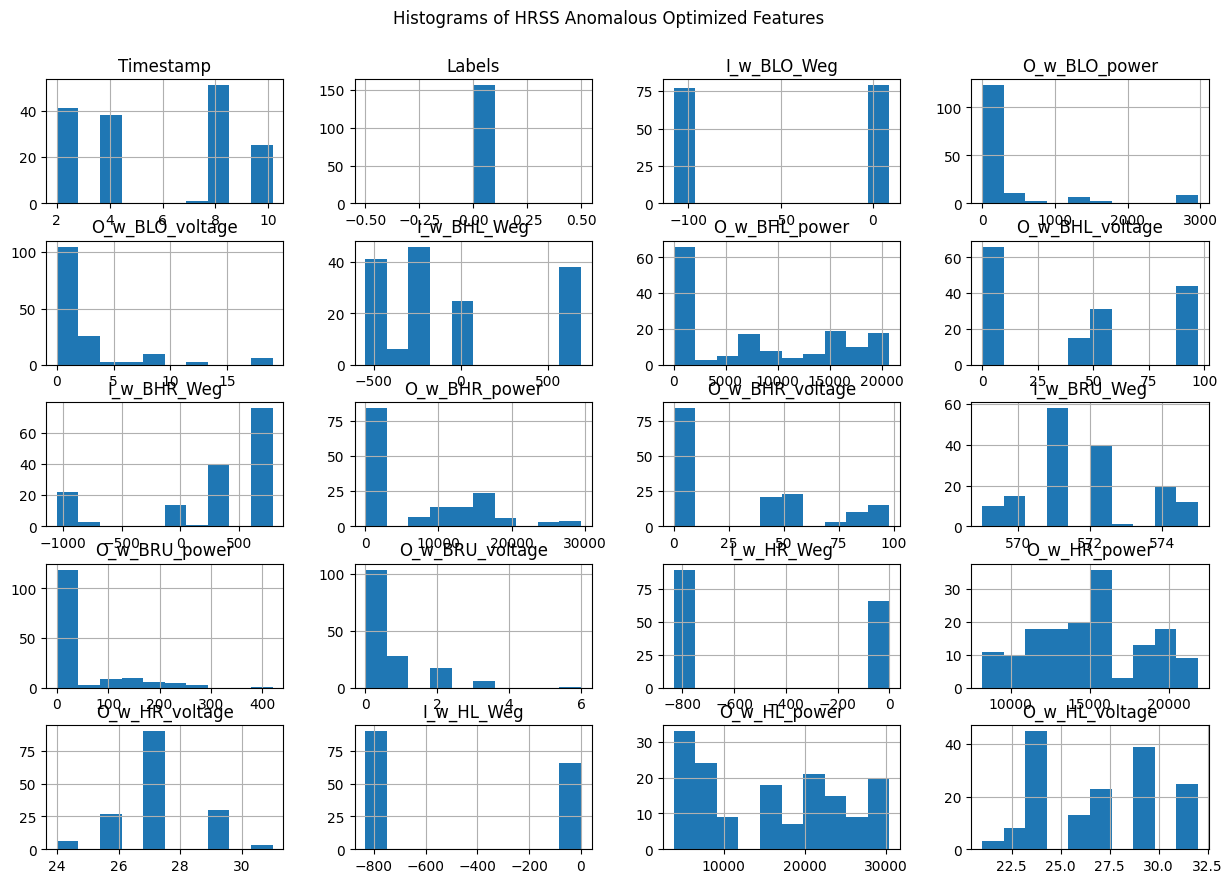

In [33]:
HRSSAnomalousOptimised.hist(figsize=(15,10))
plt.suptitle('Histograms of HRSS Anomalous Optimized Features', y=0.95)
plt.show()

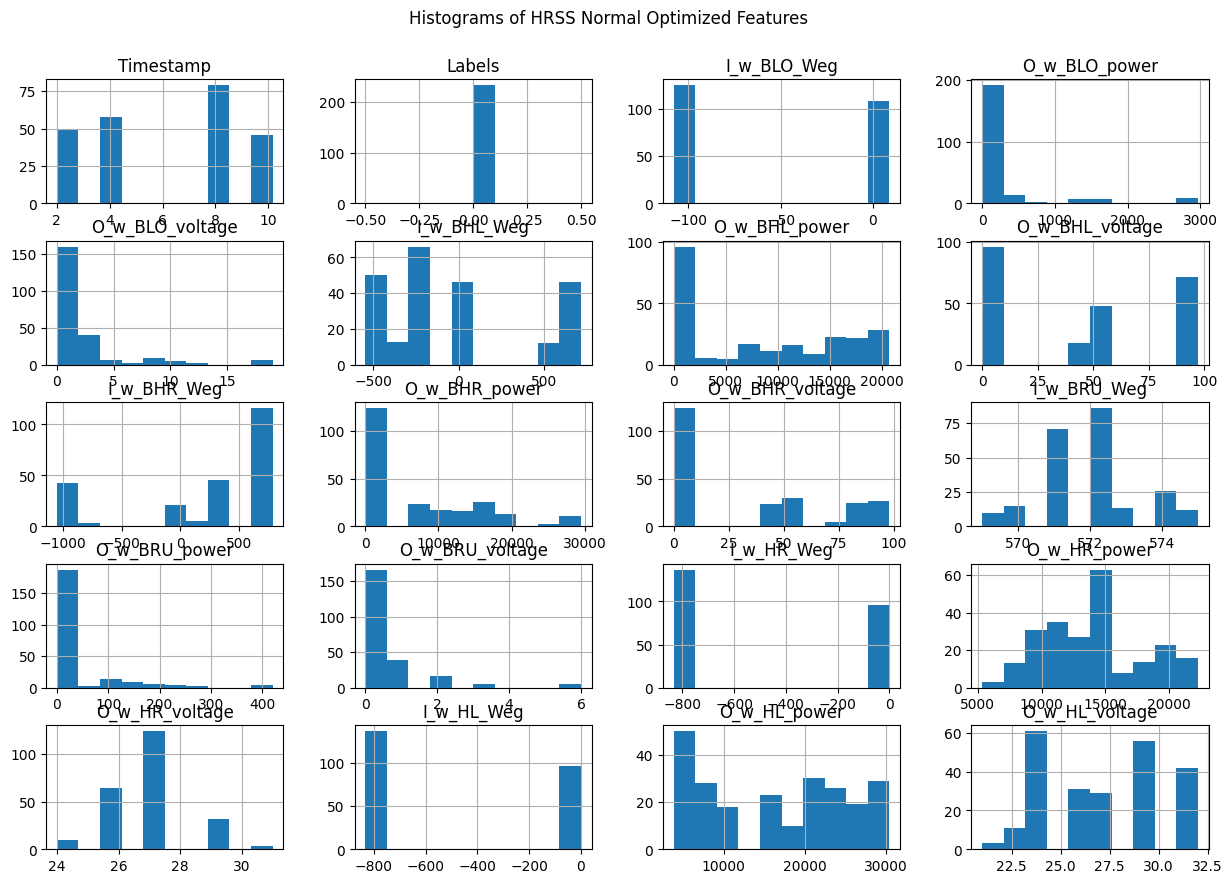

In [34]:
HRSSNormalOptimised.hist(figsize=(15,10))
plt.suptitle('Histograms of HRSS Normal Optimized Features', y=0.95)
plt.show()

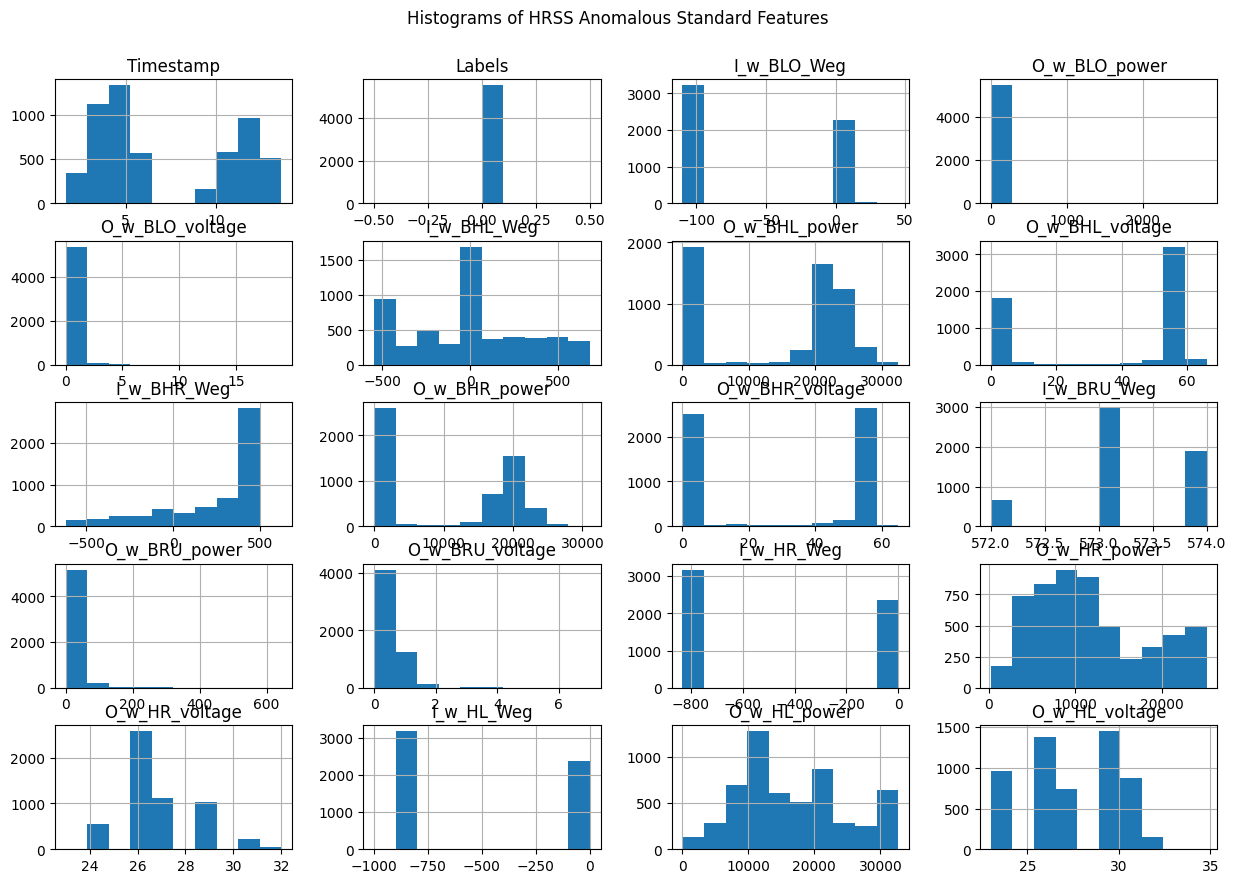

In [35]:
HRSSAnomalousStandard.hist(figsize=(15,10))
plt.suptitle('Histograms of HRSS Anomalous Standard Features', y=0.95)
plt.show()

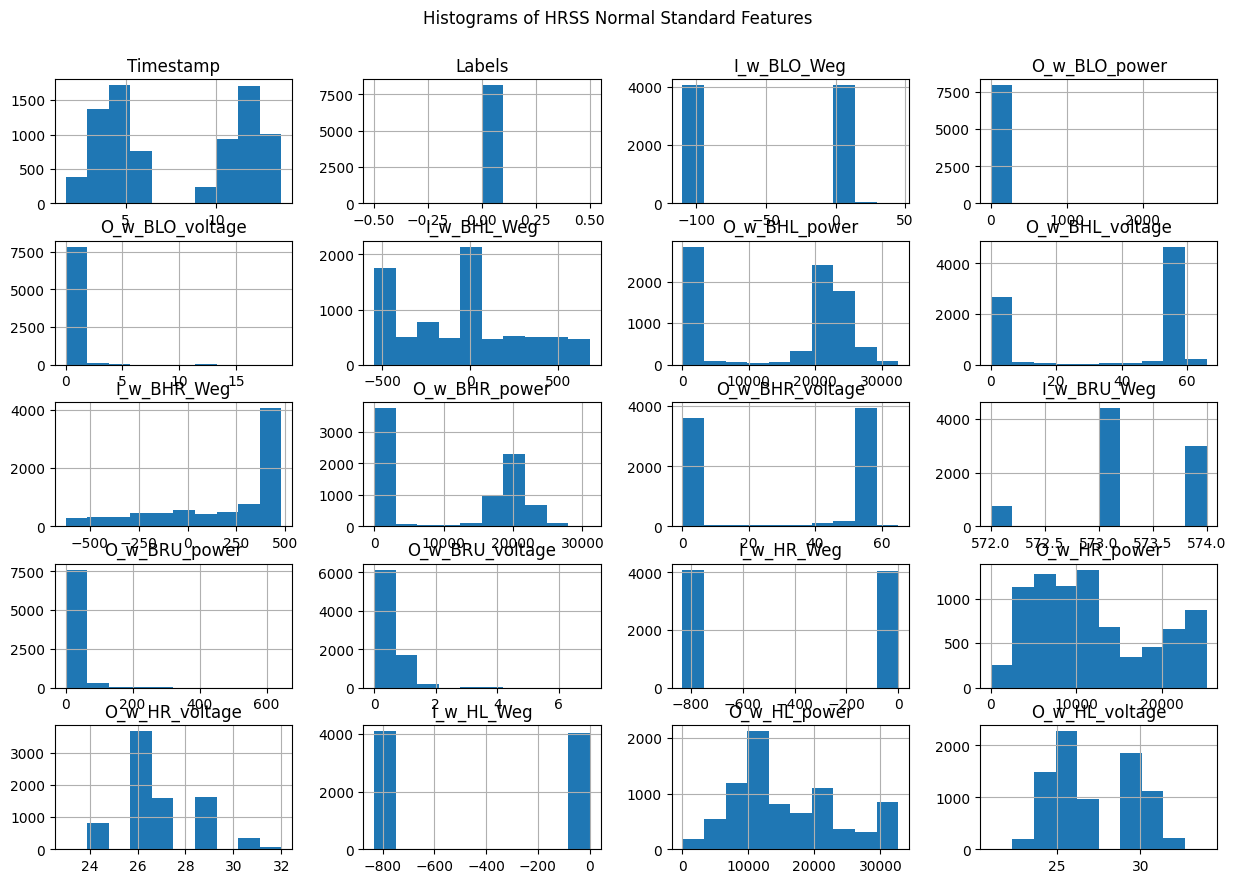

In [36]:
HRSSNormalStandard.hist(figsize=(15,10))
plt.suptitle('Histograms of HRSS Normal Standard Features', y=0.95)
plt.show()

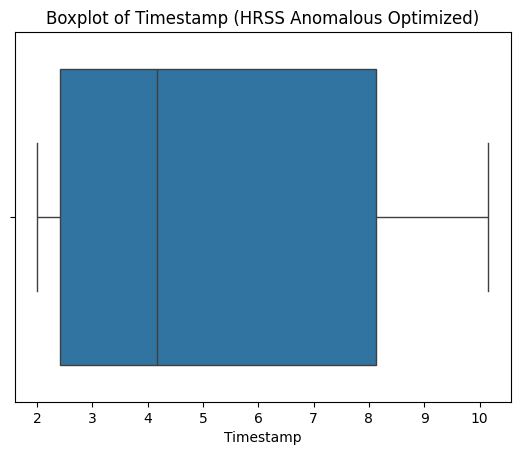

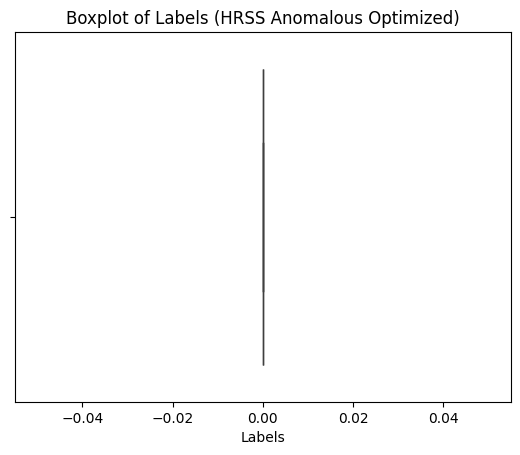

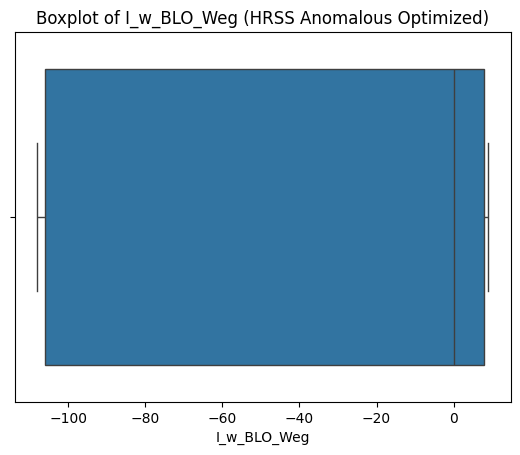

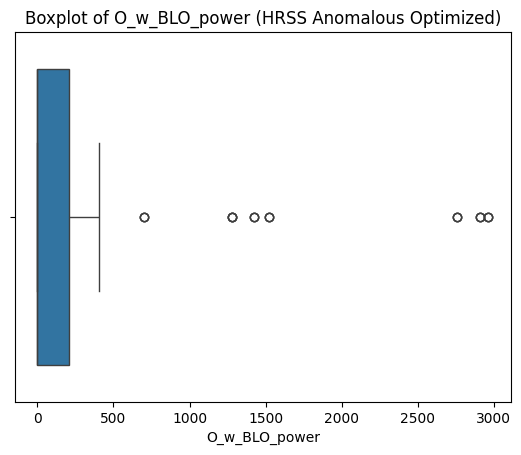

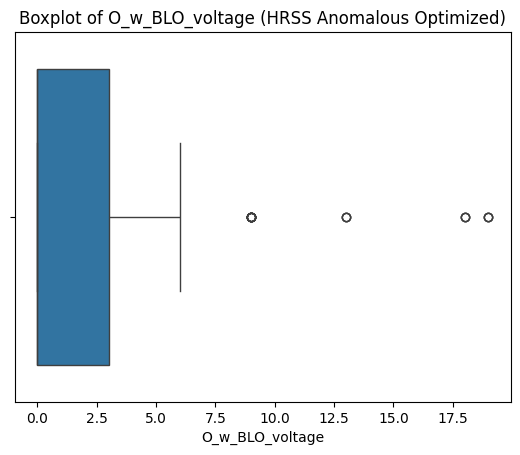

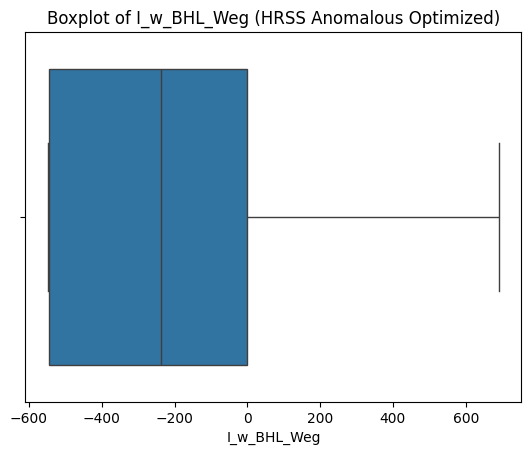

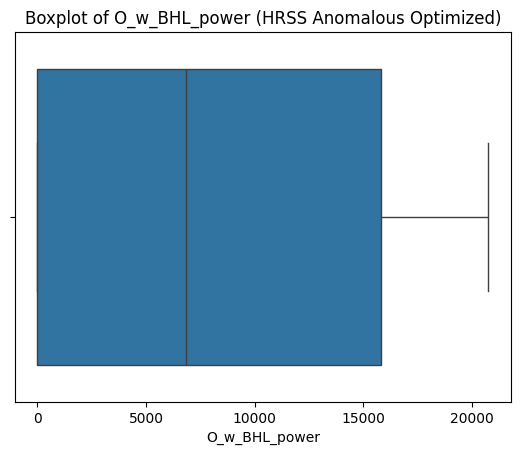

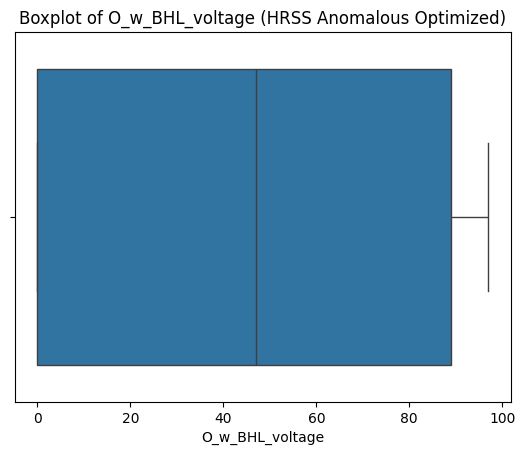

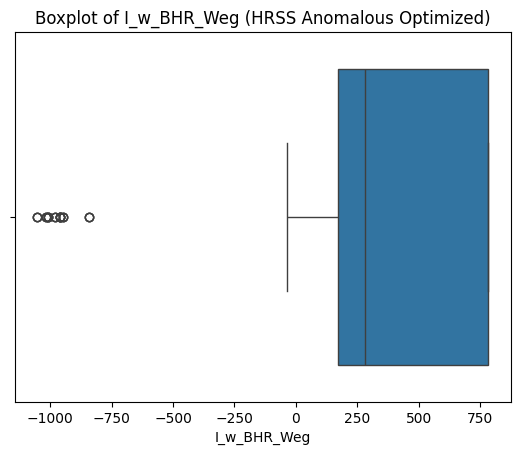

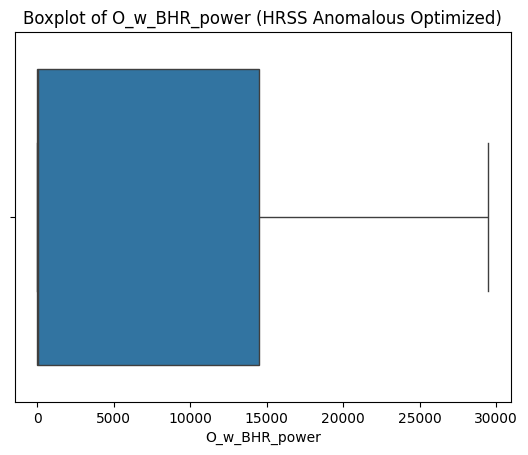

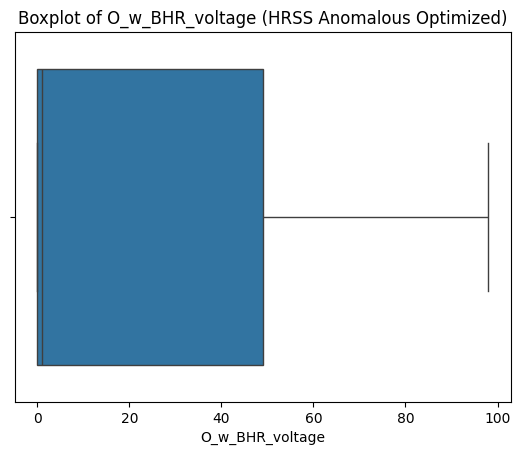

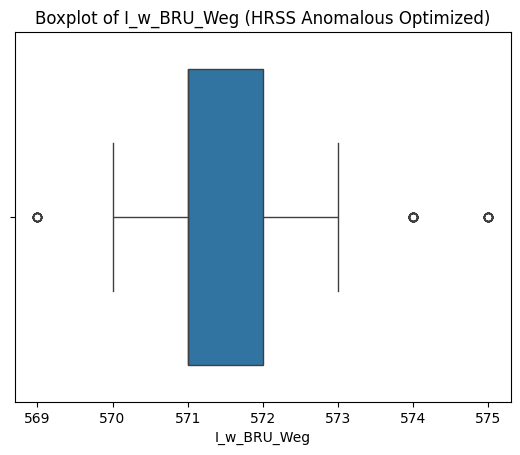

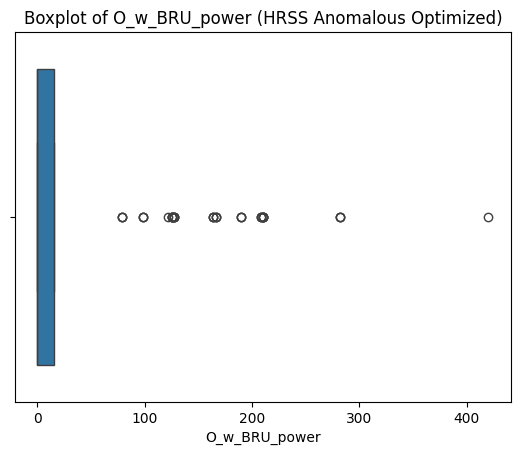

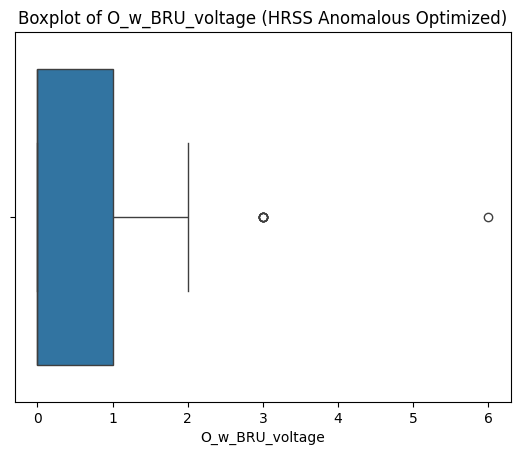

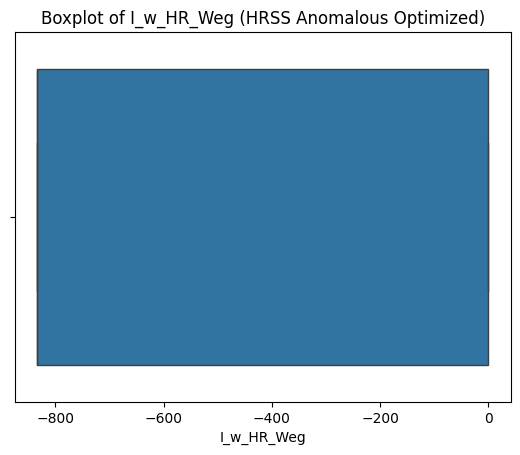

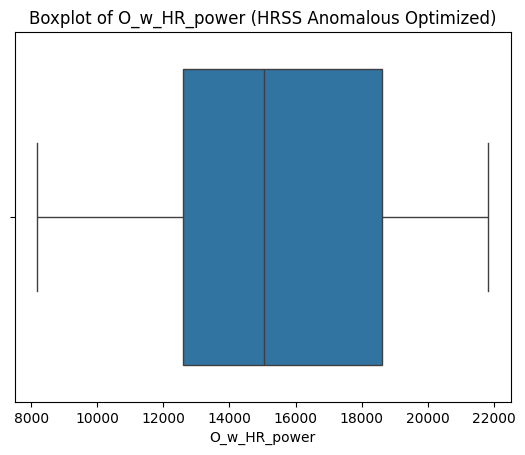

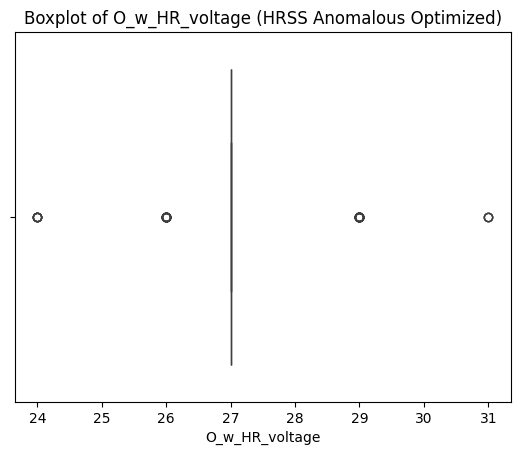

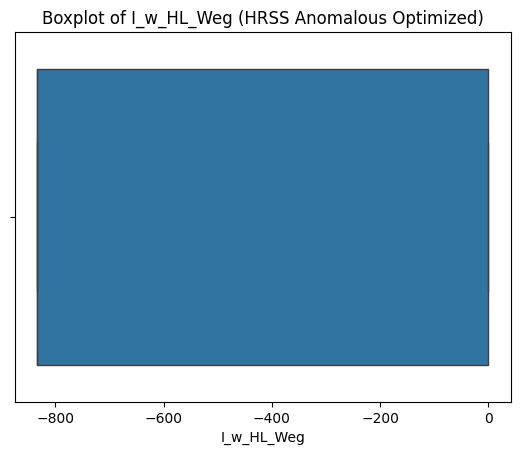

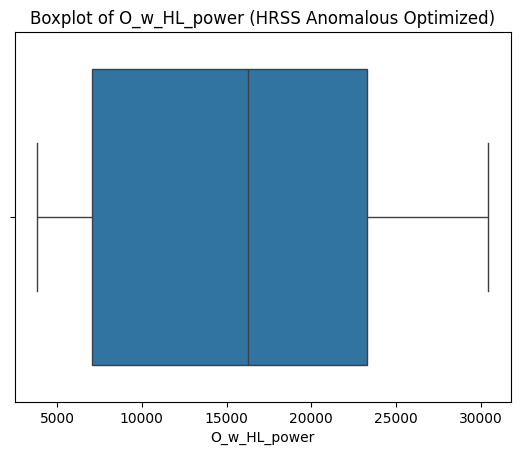

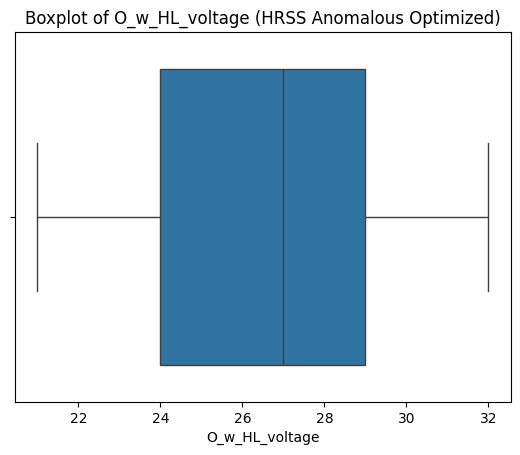

In [37]:
for column in HRSSAnomalousOptimised.select_dtypes(include=np.number).columns:
  plt.figure()
  sns.boxplot(x=HRSSAnomalousOptimised[column])
  plt.title(f'Boxplot of {column} (HRSS Anomalous Optimized)')
  plt.show()

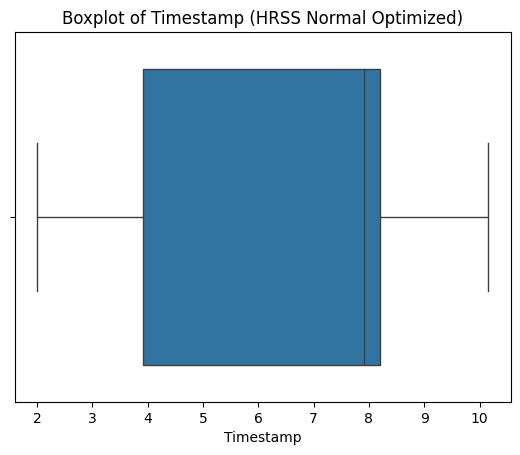

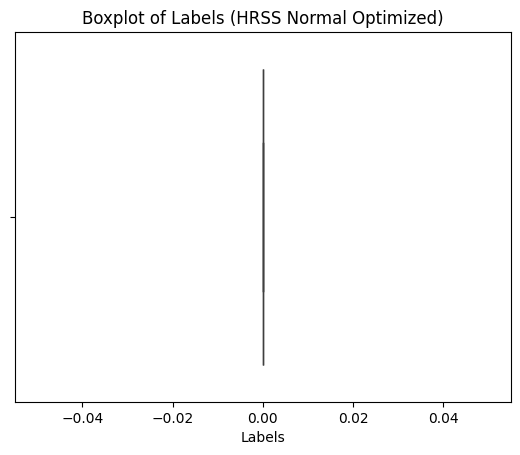

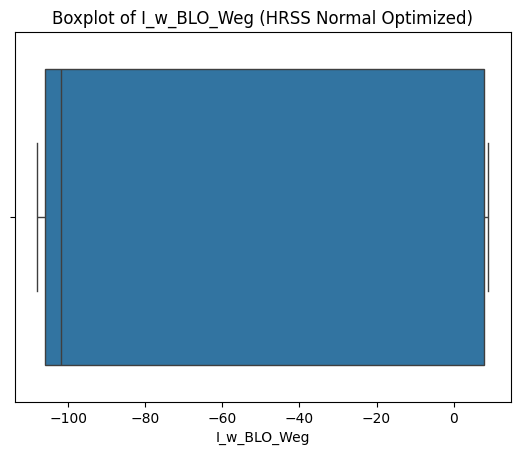

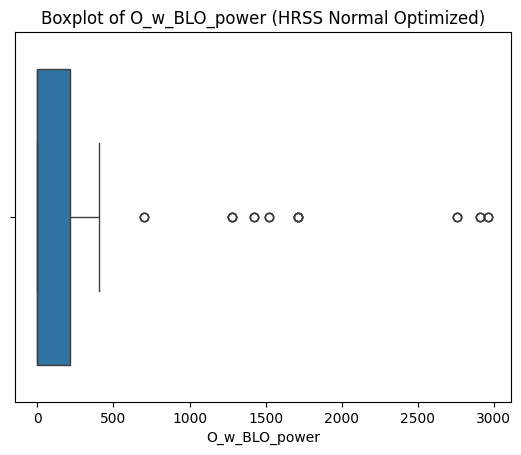

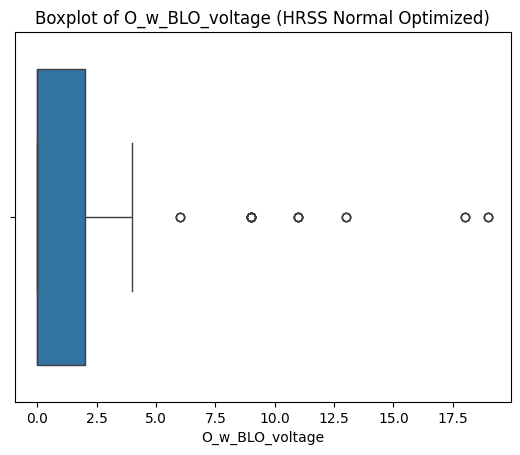

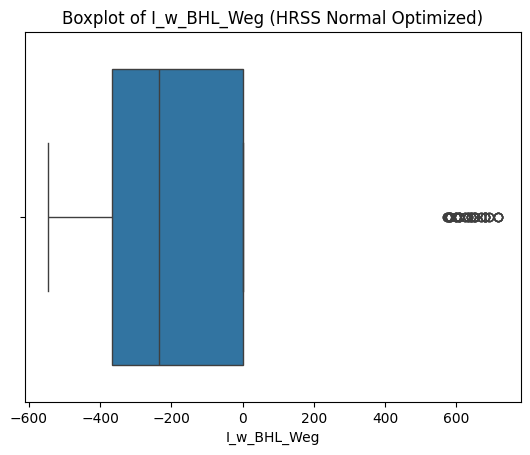

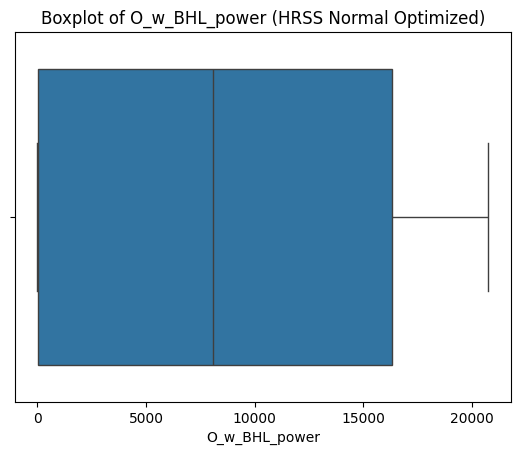

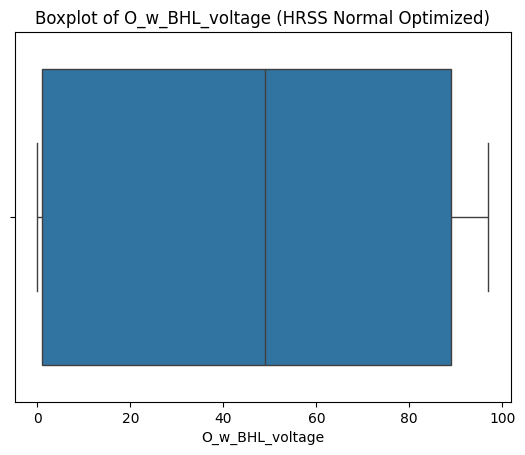

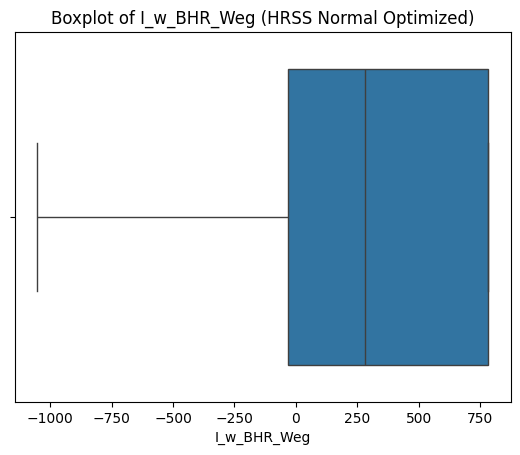

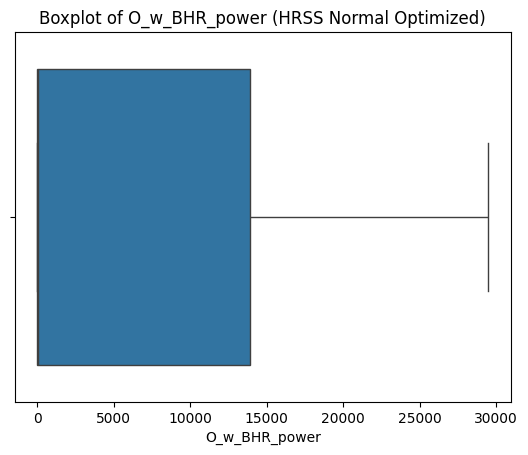

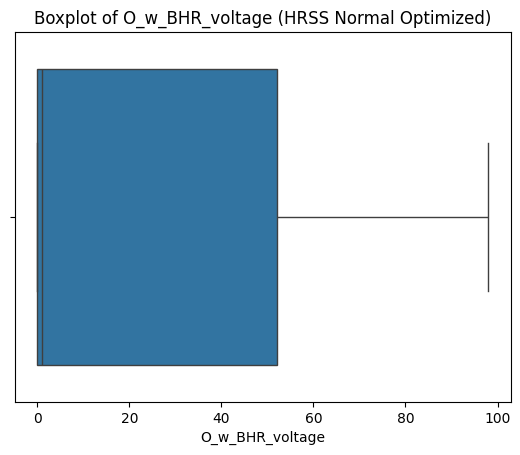

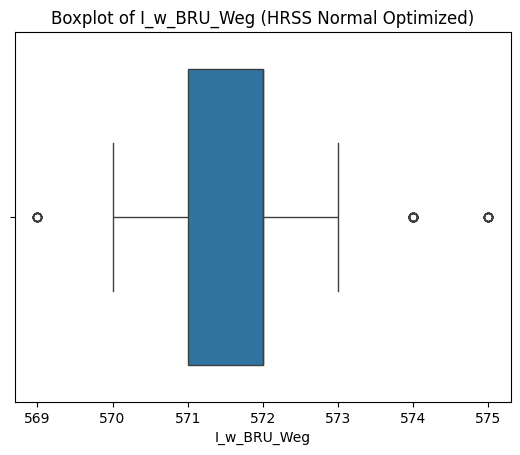

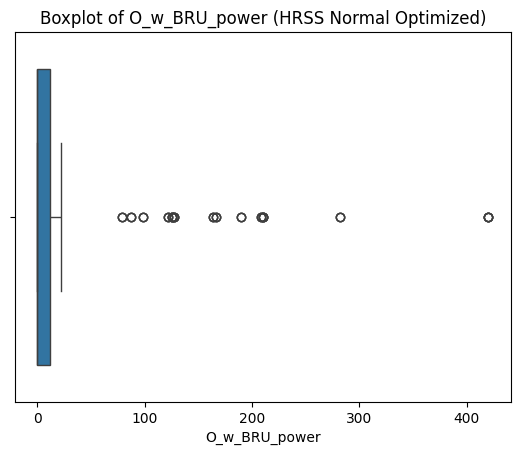

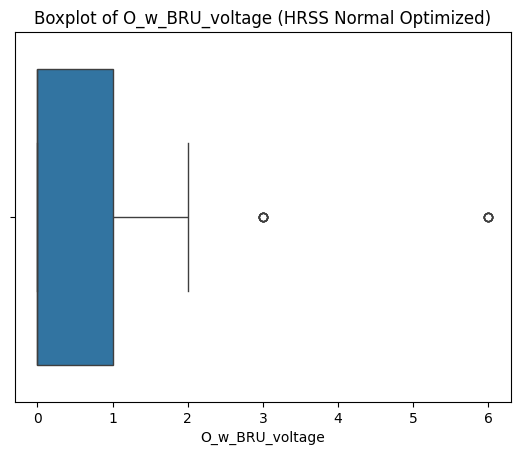

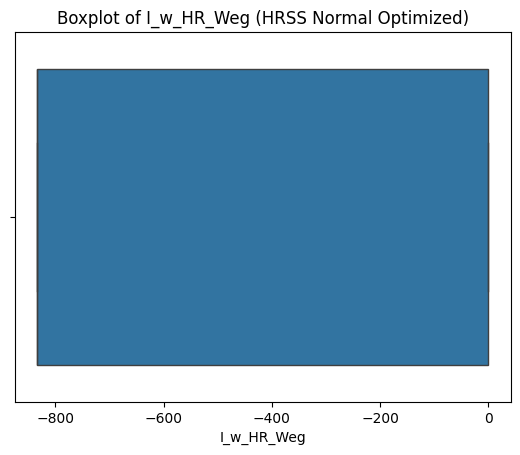

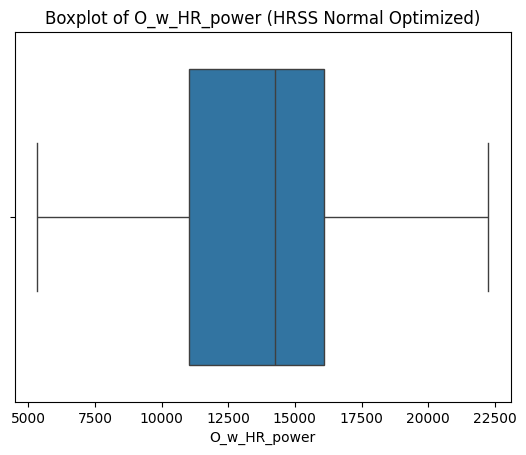

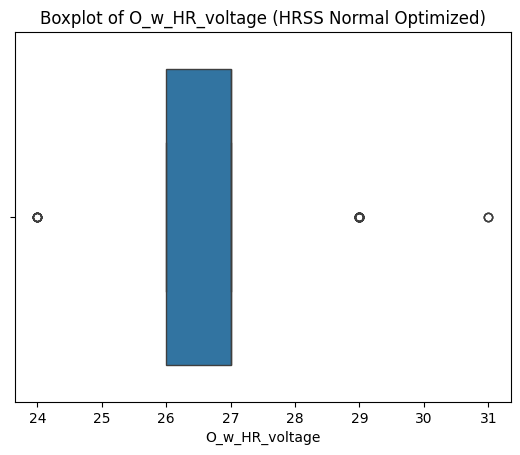

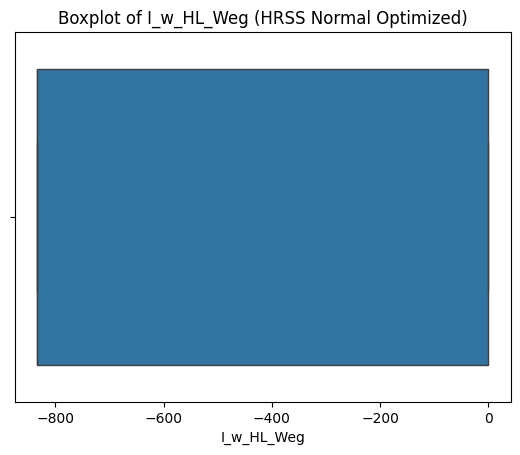

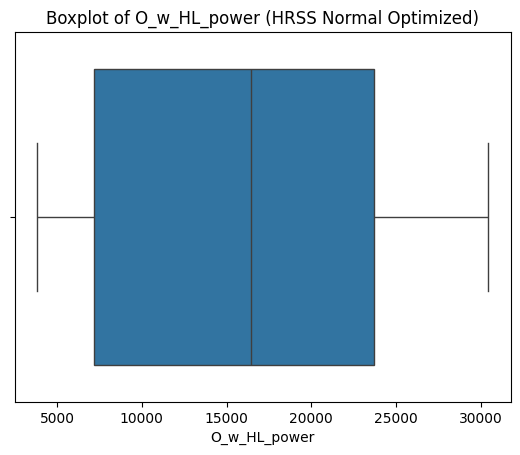

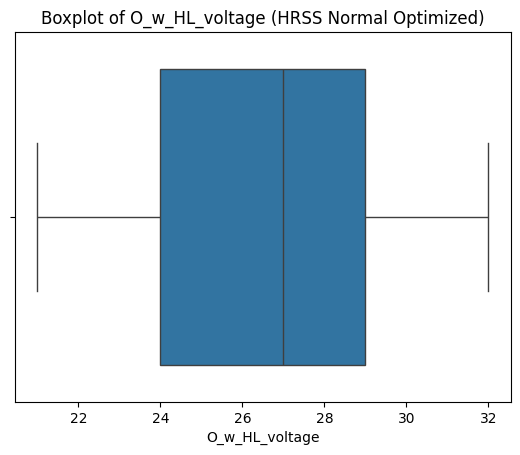

In [38]:
for column in HRSSNormalOptimised.select_dtypes(include=np.number).columns:
  plt.figure()
  sns.boxplot(x=HRSSNormalOptimised[column])
  plt.title(f'Boxplot of {column} (HRSS Normal Optimized)')
  plt.show()

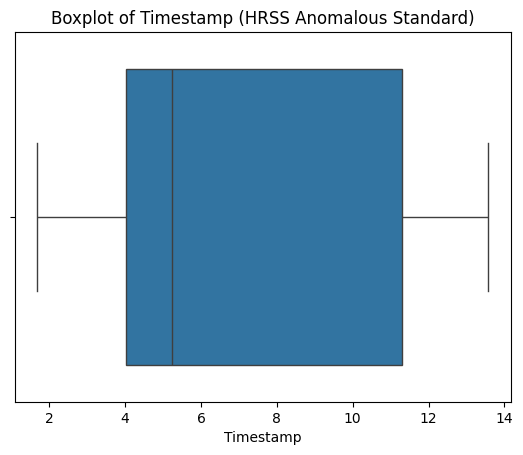

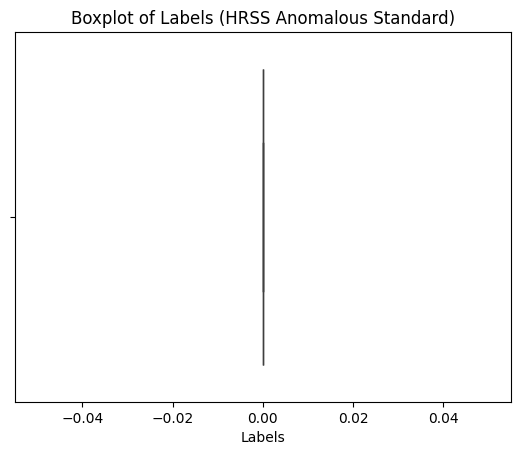

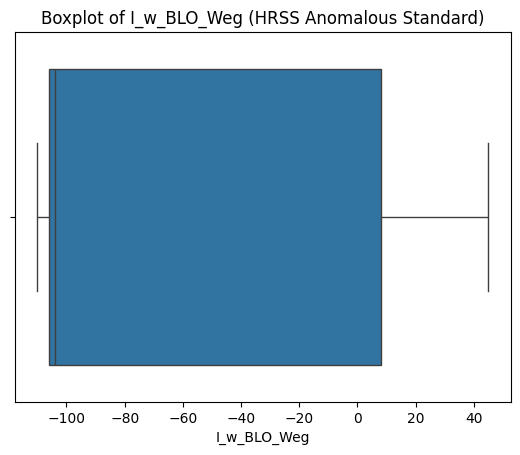

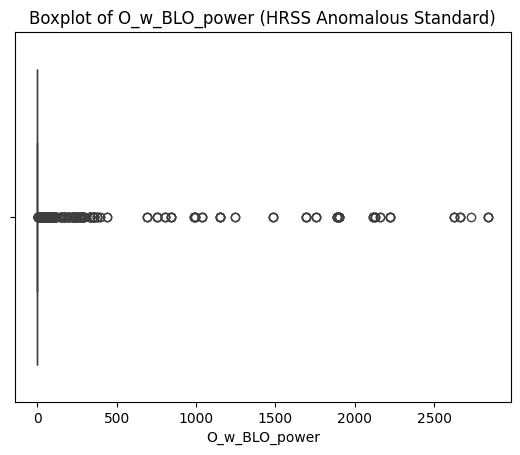

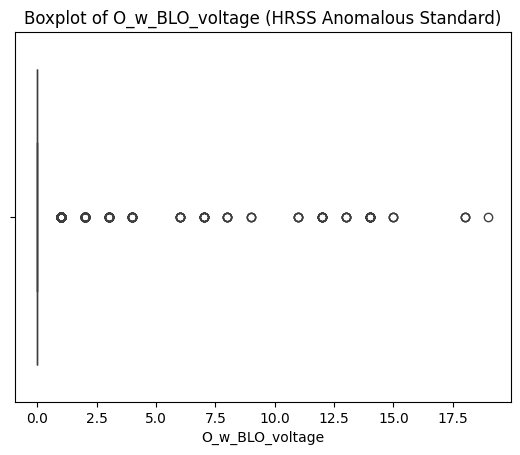

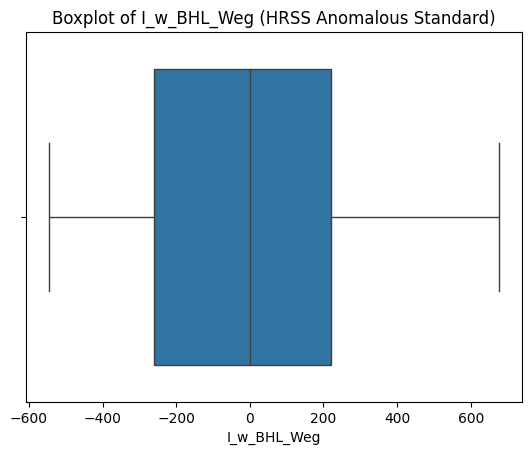

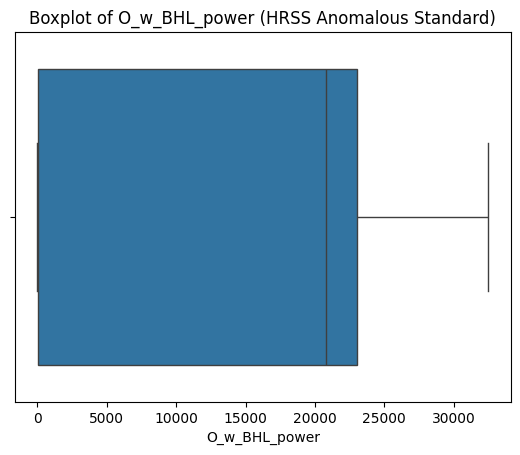

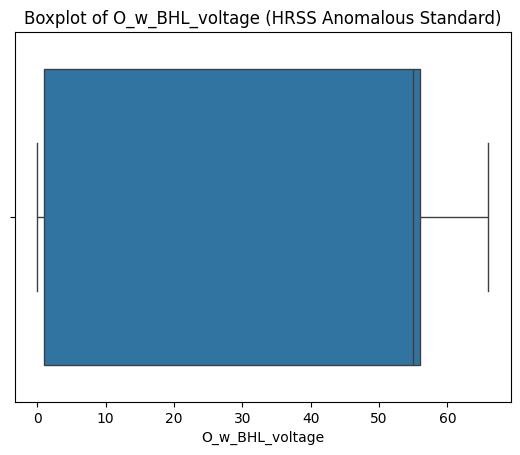

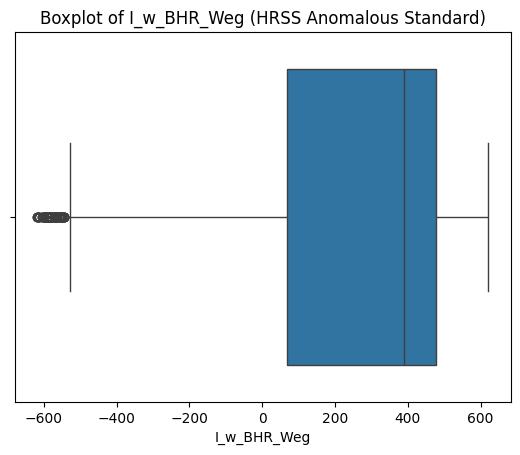

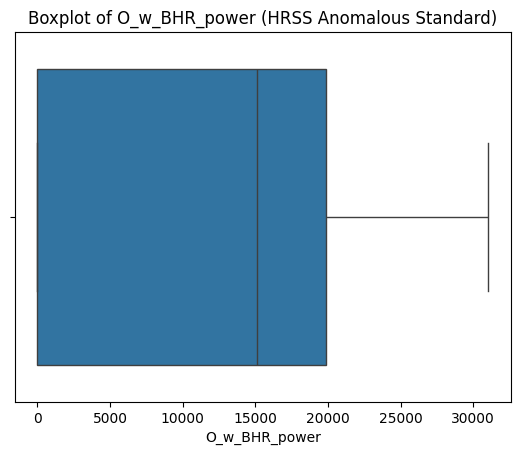

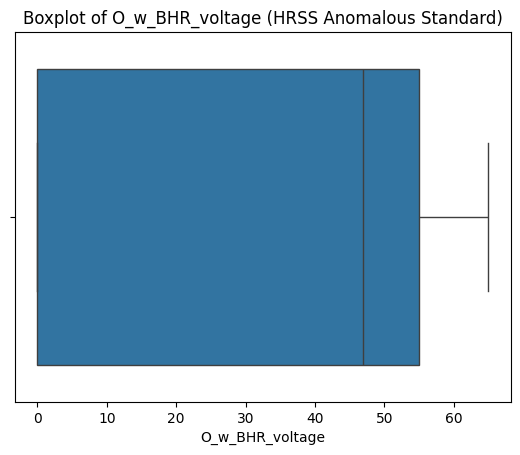

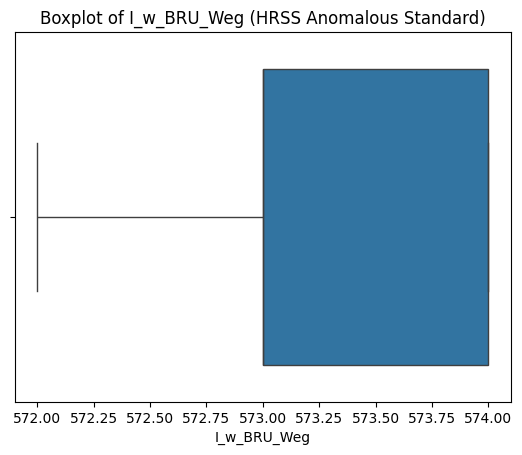

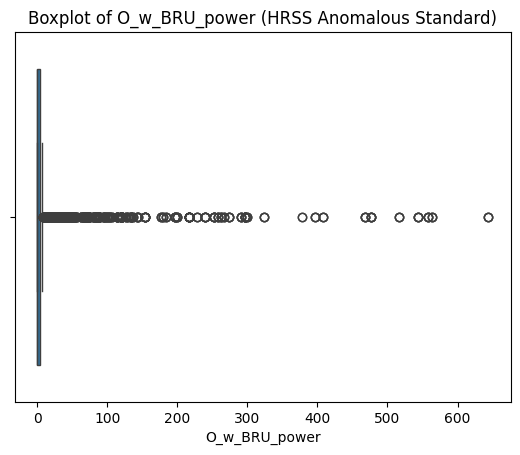

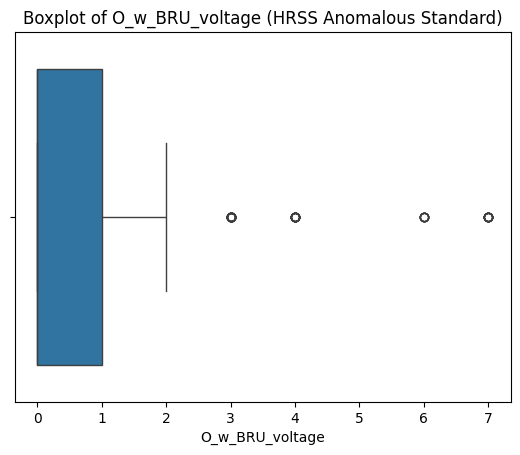

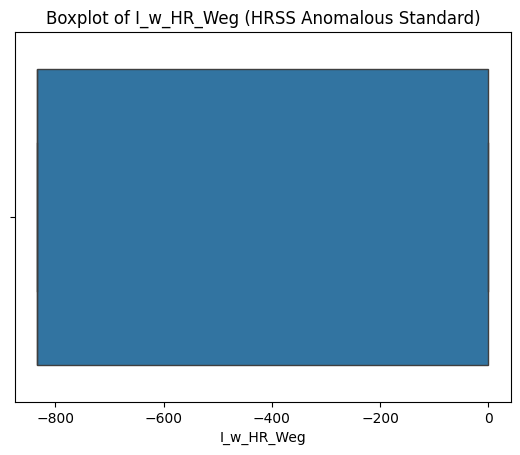

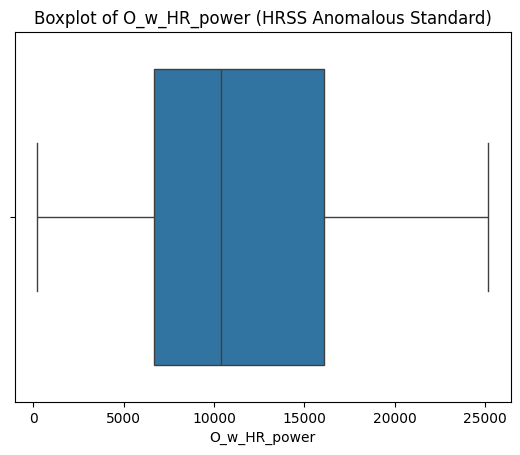

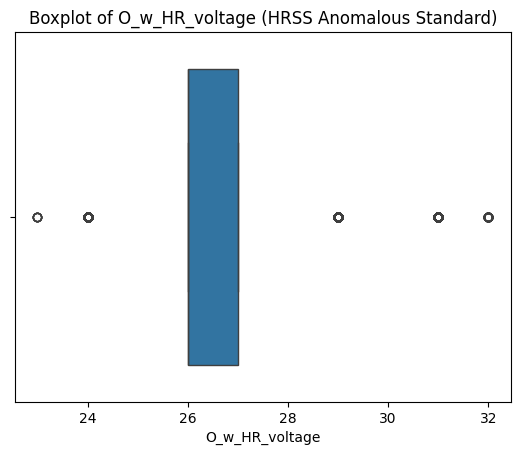

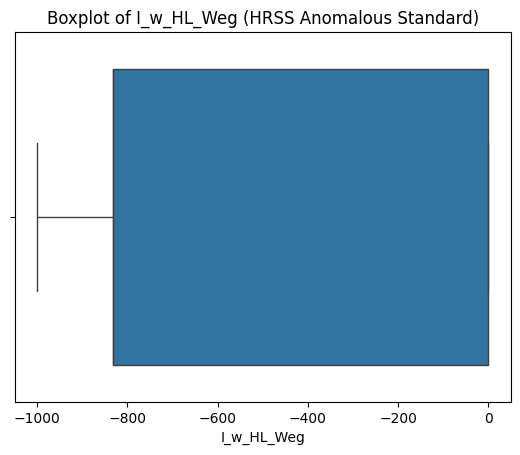

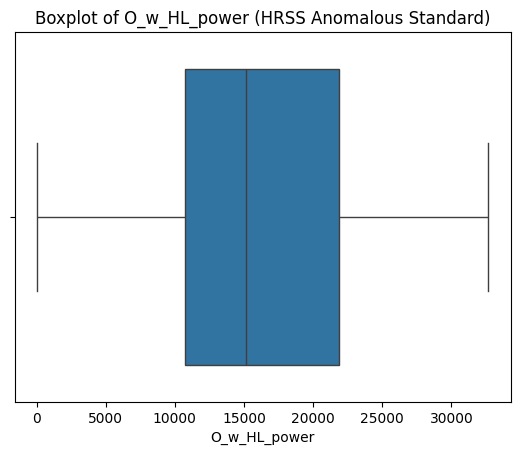

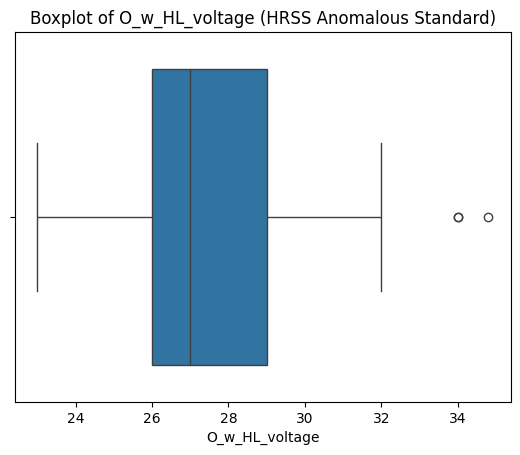

In [39]:
for column in HRSSAnomalousStandard.select_dtypes(include=np.number).columns:
  plt.figure()
  sns.boxplot(x=HRSSAnomalousStandard[column])
  plt.title(f'Boxplot of {column} (HRSS Anomalous Standard)')
  plt.show()

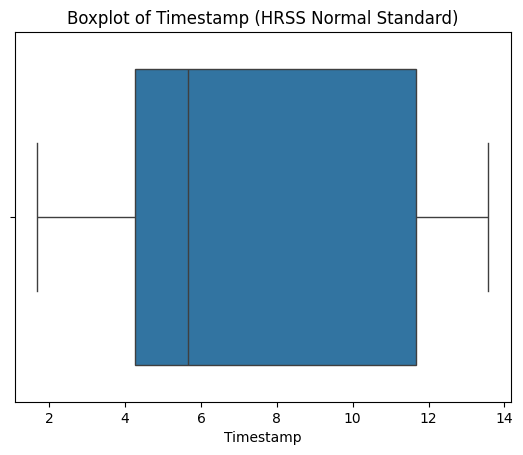

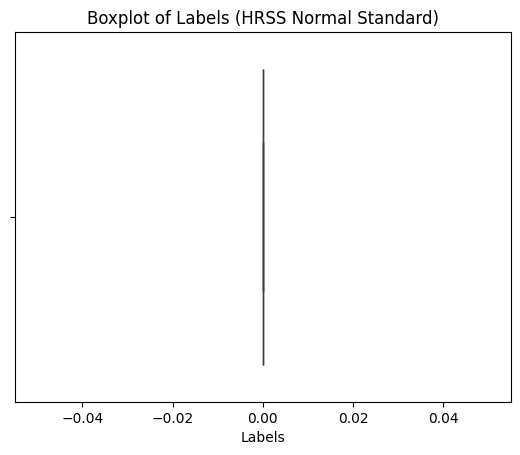

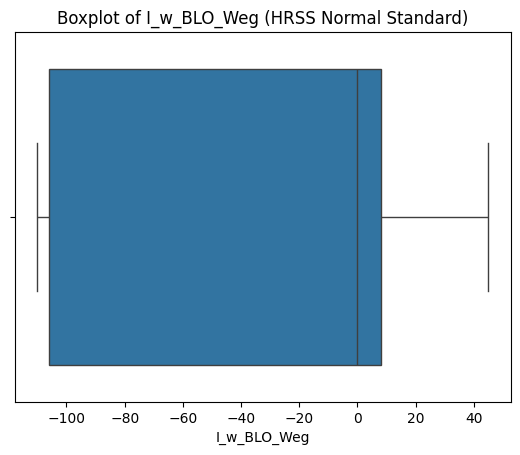

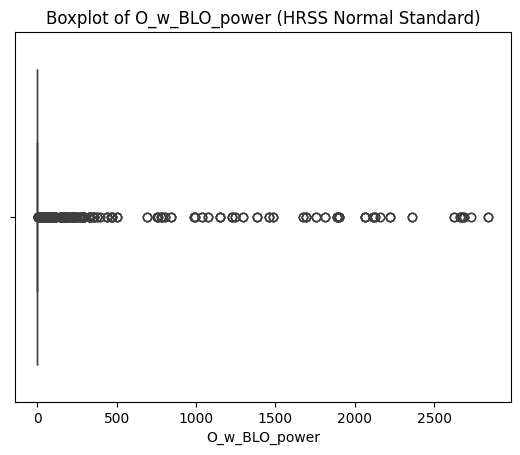

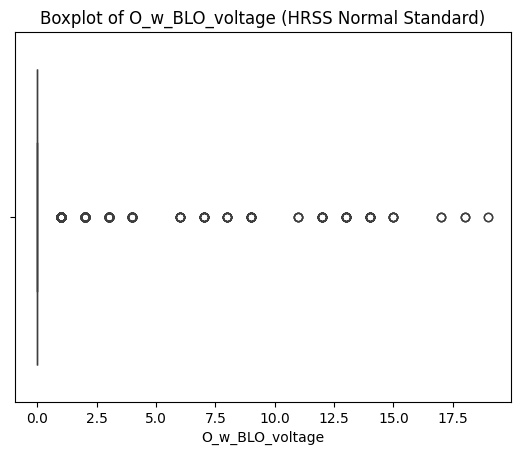

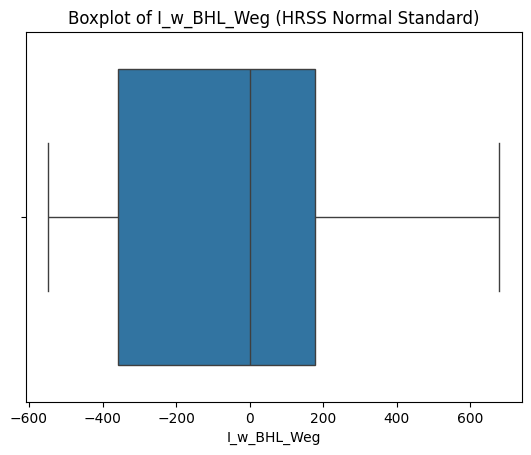

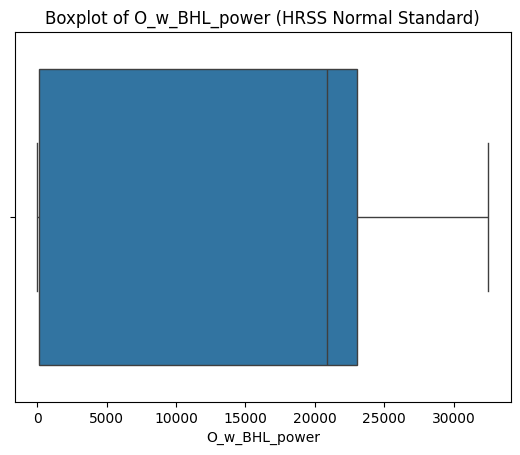

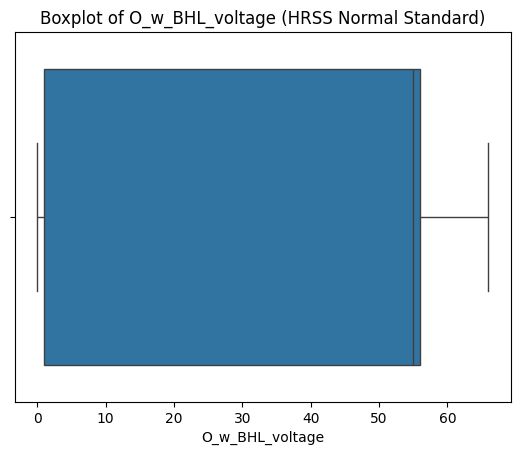

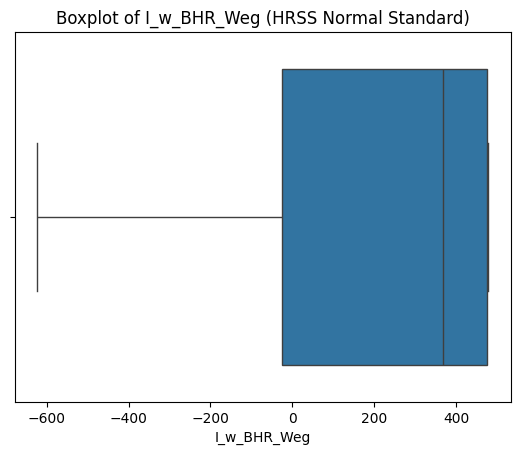

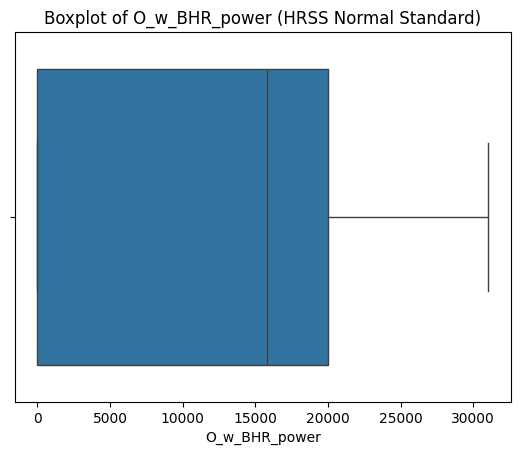

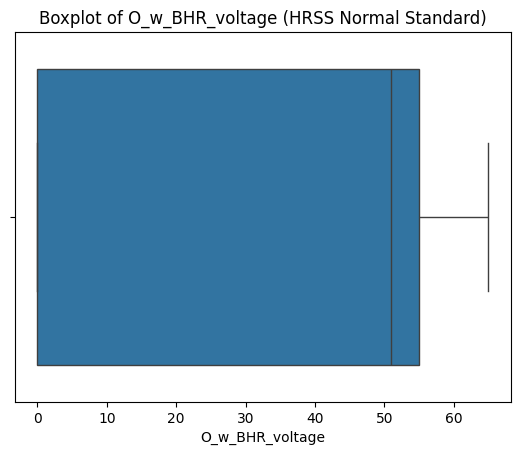

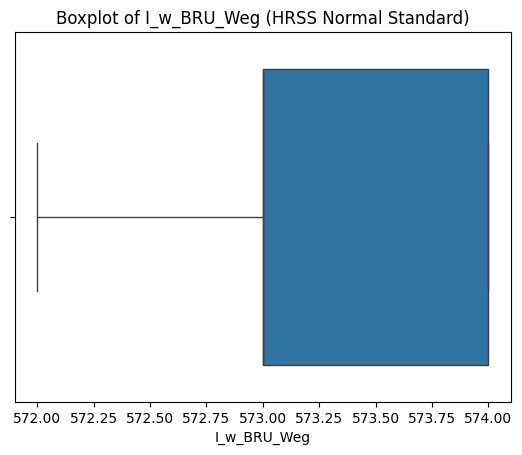

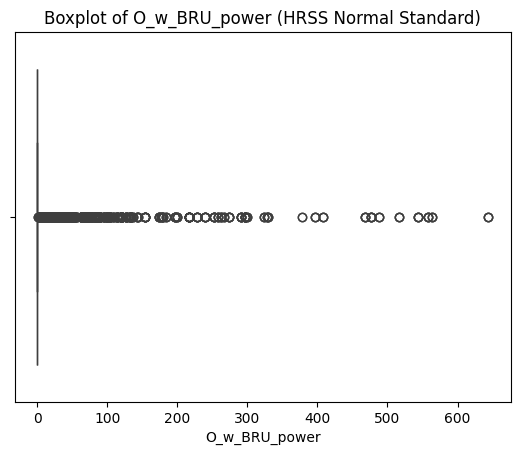

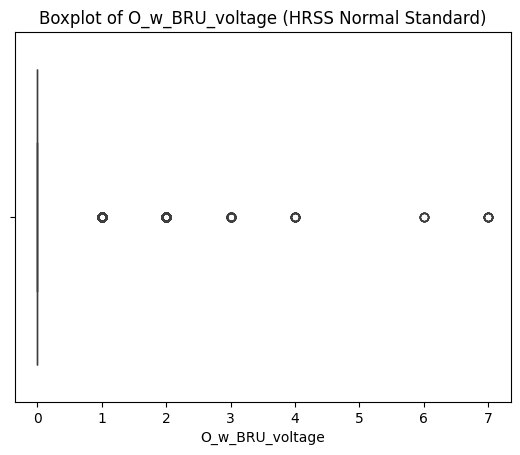

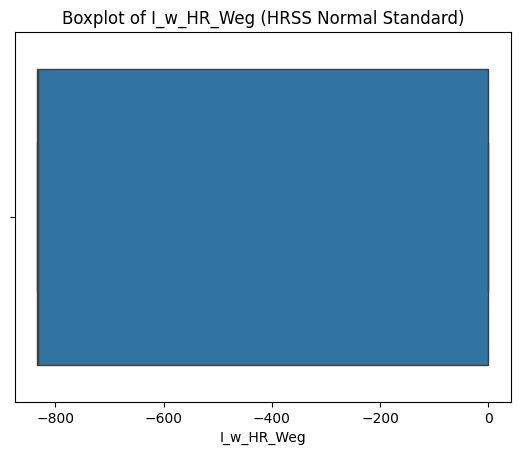

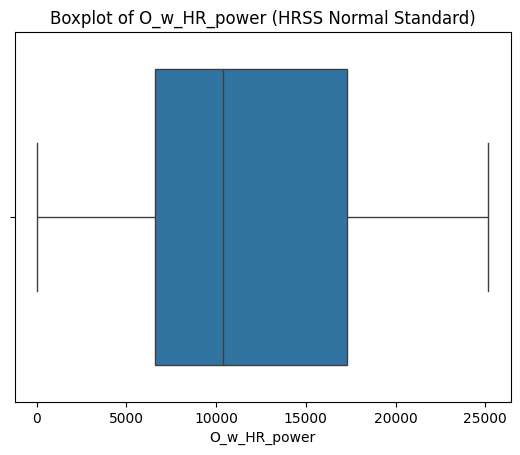

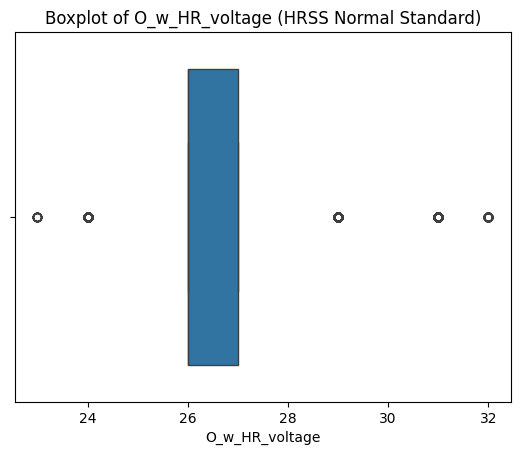

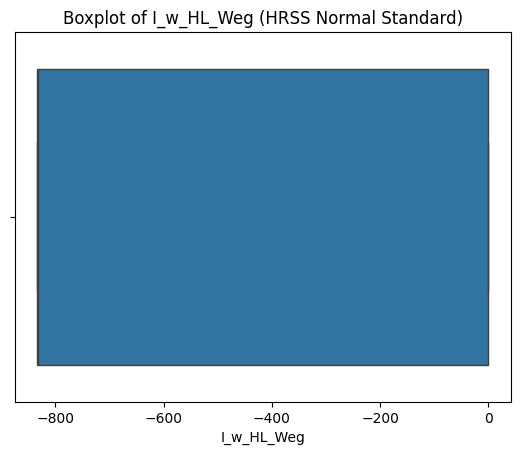

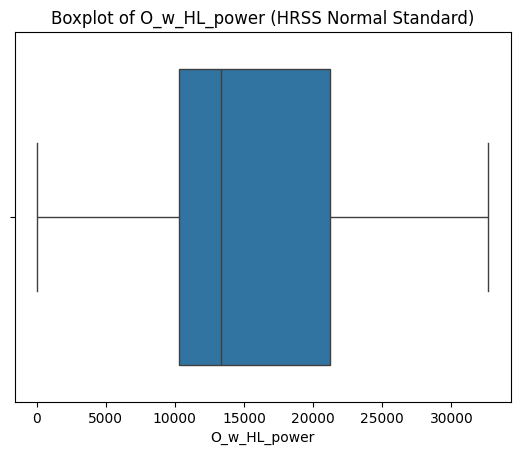

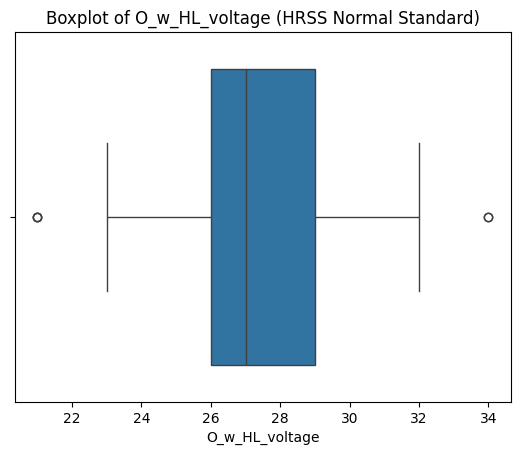

In [40]:
for column in HRSSNormalStandard.select_dtypes(include=np.number).columns:
  plt.figure()
  sns.boxplot(x=HRSSNormalStandard[column])
  plt.title(f'Boxplot of {column} (HRSS Normal Standard)')
  plt.show()

# Correlation Matrix of Dataframes

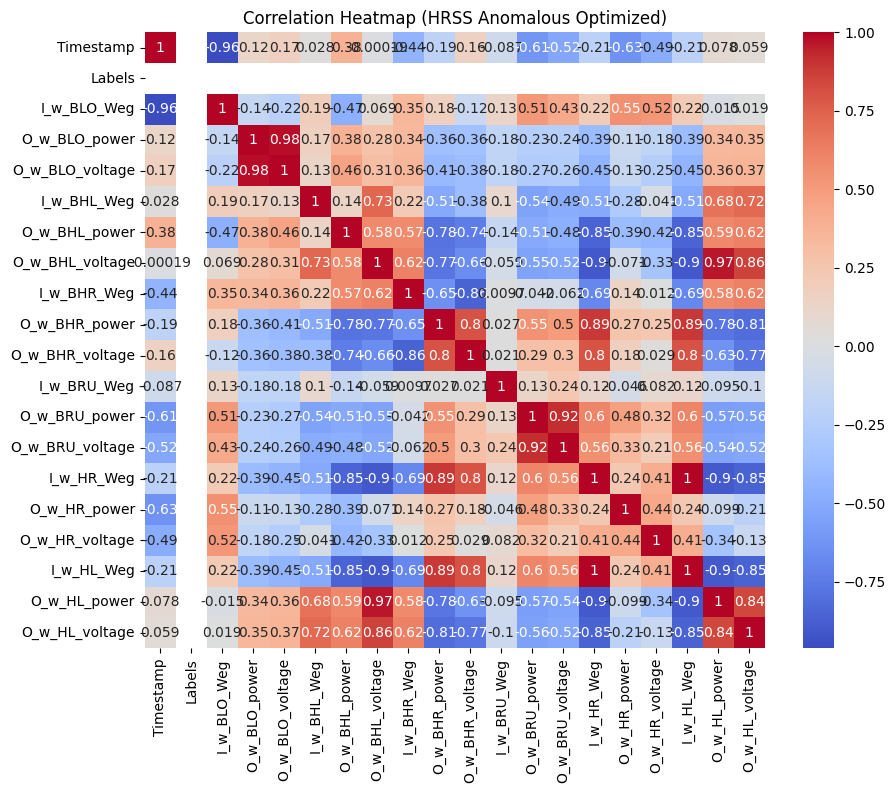

In [41]:
# Correlation heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(HRSSAnomalousOptimised.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (HRSS Anomalous Optimized)')
plt.show()

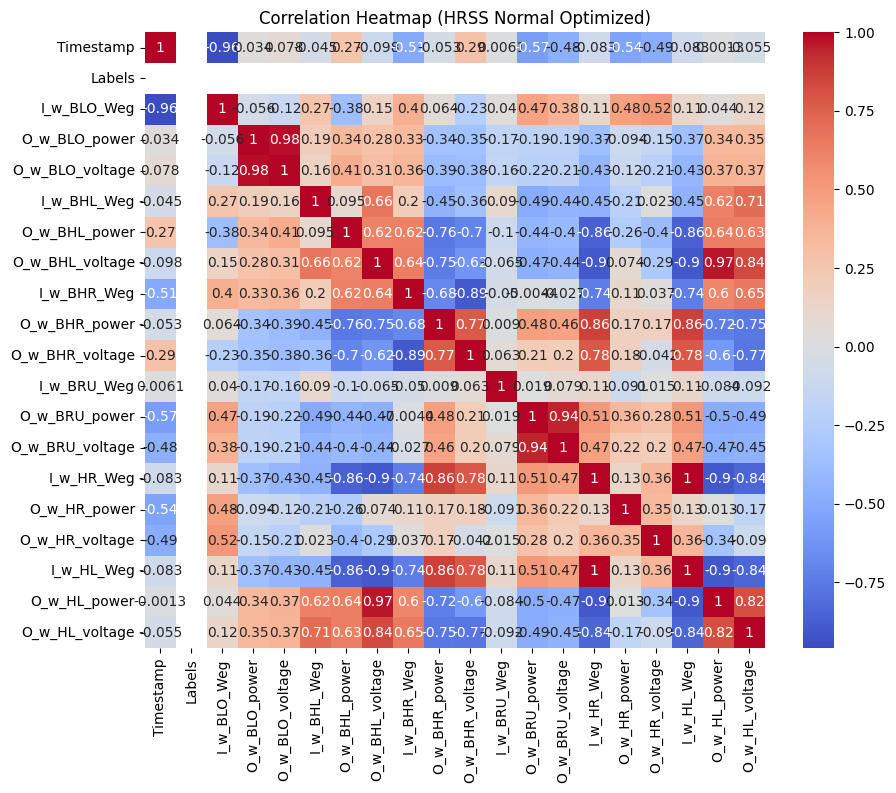

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(HRSSNormalOptimised.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (HRSS Normal Optimized)')
plt.show()

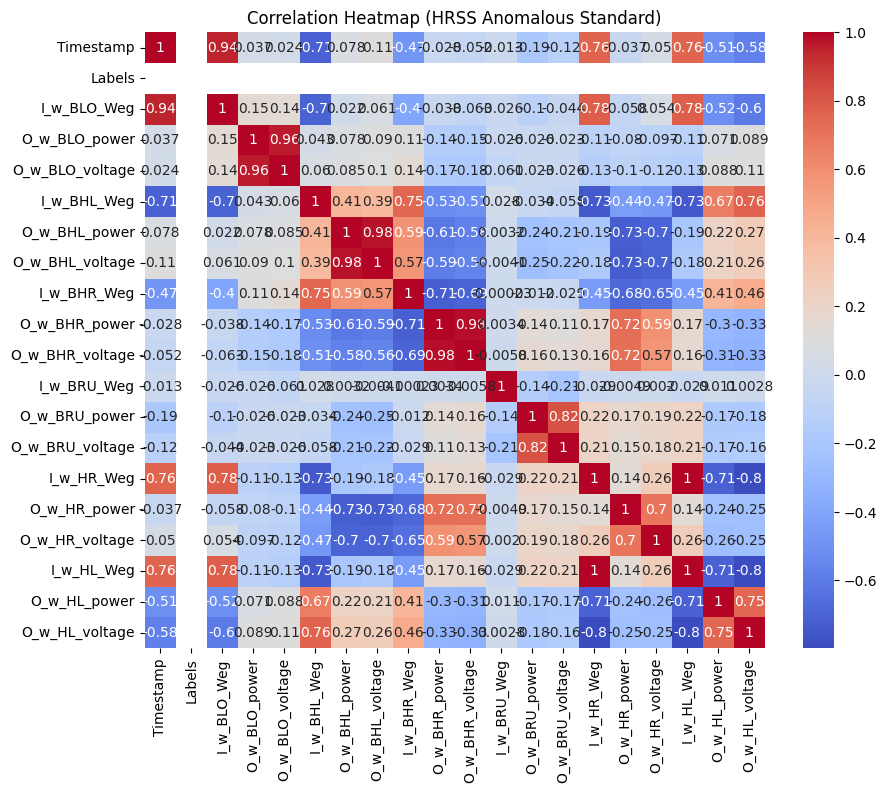

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(HRSSAnomalousStandard.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (HRSS Anomalous Standard)')
plt.show()

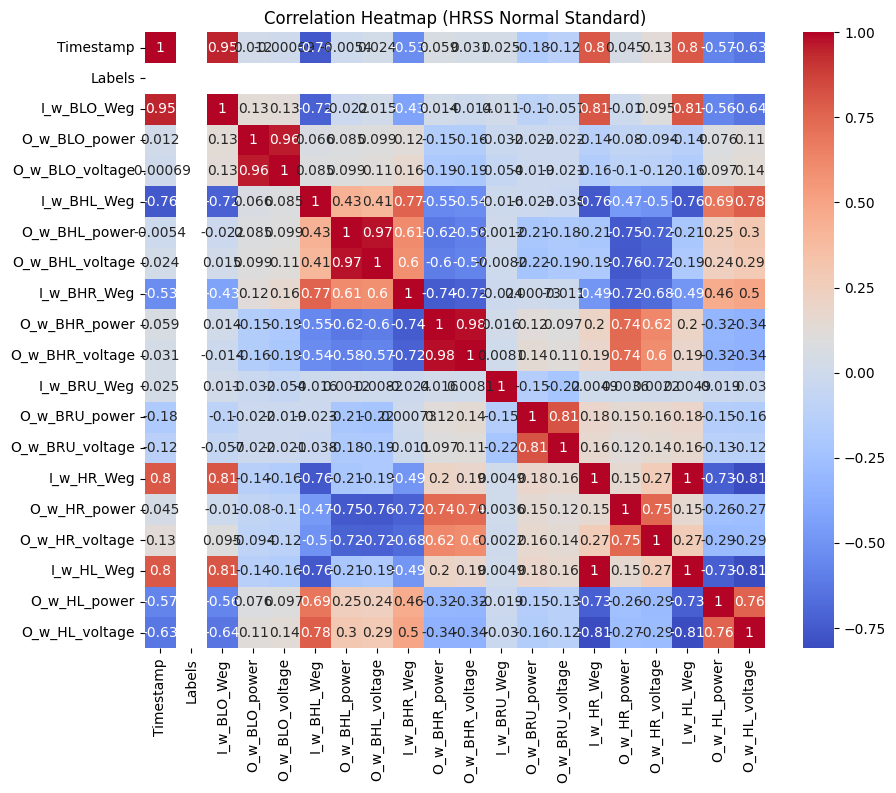

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(HRSSNormalStandard.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (HRSS Normal Standard)')
plt.show()

In [45]:
# Data Info about HRSSAnomalousOptimised
HRSSAnomalousOptimised.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 228 to 18998
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        156 non-null    float64
 1   Labels           156 non-null    int64  
 2   I_w_BLO_Weg      156 non-null    float64
 3   O_w_BLO_power    156 non-null    float64
 4   O_w_BLO_voltage  156 non-null    float64
 5   I_w_BHL_Weg      156 non-null    float64
 6   O_w_BHL_power    156 non-null    float64
 7   O_w_BHL_voltage  156 non-null    float64
 8   I_w_BHR_Weg      156 non-null    float64
 9   O_w_BHR_power    156 non-null    float64
 10  O_w_BHR_voltage  156 non-null    float64
 11  I_w_BRU_Weg      156 non-null    float64
 12  O_w_BRU_power    156 non-null    float64
 13  O_w_BRU_voltage  156 non-null    float64
 14  I_w_HR_Weg       156 non-null    float64
 15  O_w_HR_power     156 non-null    float64
 16  O_w_HR_voltage   156 non-null    float64
 17  I_w_HL_Weg       

In [46]:
# Data Info about HRSSNormalOptimised
HRSSNormalOptimised.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 228 to 20693
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        233 non-null    float64
 1   Labels           233 non-null    int64  
 2   I_w_BLO_Weg      233 non-null    int64  
 3   O_w_BLO_power    233 non-null    int64  
 4   O_w_BLO_voltage  233 non-null    int64  
 5   I_w_BHL_Weg      233 non-null    int64  
 6   O_w_BHL_power    233 non-null    int64  
 7   O_w_BHL_voltage  233 non-null    int64  
 8   I_w_BHR_Weg      233 non-null    int64  
 9   O_w_BHR_power    233 non-null    int64  
 10  O_w_BHR_voltage  233 non-null    int64  
 11  I_w_BRU_Weg      233 non-null    int64  
 12  O_w_BRU_power    233 non-null    int64  
 13  O_w_BRU_voltage  233 non-null    int64  
 14  I_w_HR_Weg       233 non-null    int64  
 15  O_w_HR_power     233 non-null    int64  
 16  O_w_HR_voltage   233 non-null    int64  
 17  I_w_HL_Weg       

In [47]:
# Data Info about HRSSAnomalousStandard
HRSSAnomalousStandard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5553 entries, 571 to 23591
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        5553 non-null   float64
 1   Labels           5553 non-null   int64  
 2   I_w_BLO_Weg      5553 non-null   float64
 3   O_w_BLO_power    5553 non-null   float64
 4   O_w_BLO_voltage  5553 non-null   float64
 5   I_w_BHL_Weg      5553 non-null   float64
 6   O_w_BHL_power    5553 non-null   float64
 7   O_w_BHL_voltage  5553 non-null   float64
 8   I_w_BHR_Weg      5553 non-null   float64
 9   O_w_BHR_power    5553 non-null   float64
 10  O_w_BHR_voltage  5553 non-null   float64
 11  I_w_BRU_Weg      5553 non-null   float64
 12  O_w_BRU_power    5553 non-null   float64
 13  O_w_BRU_voltage  5553 non-null   float64
 14  I_w_HR_Weg       5553 non-null   float64
 15  O_w_HR_power     5553 non-null   float64
 16  O_w_HR_voltage   5553 non-null   float64
 17  I_w_HL_Weg      

In [48]:
# Data Info about HRSSNormalStandard
HRSSNormalStandard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8136 entries, 519 to 25879
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8136 non-null   float64
 1   Labels           8136 non-null   int64  
 2   I_w_BLO_Weg      8136 non-null   int64  
 3   O_w_BLO_power    8136 non-null   int64  
 4   O_w_BLO_voltage  8136 non-null   int64  
 5   I_w_BHL_Weg      8136 non-null   int64  
 6   O_w_BHL_power    8136 non-null   int64  
 7   O_w_BHL_voltage  8136 non-null   int64  
 8   I_w_BHR_Weg      8136 non-null   int64  
 9   O_w_BHR_power    8136 non-null   int64  
 10  O_w_BHR_voltage  8136 non-null   int64  
 11  I_w_BRU_Weg      8136 non-null   int64  
 12  O_w_BRU_power    8136 non-null   int64  
 13  O_w_BRU_voltage  8136 non-null   int64  
 14  I_w_HR_Weg       8136 non-null   int64  
 15  O_w_HR_power     8136 non-null   int64  
 16  O_w_HR_voltage   8136 non-null   int64  
 17  I_w_HL_Weg      

In [51]:
# Adding a column to dataframes
HRSSAnomalousOptimised['Source'] = 'AnomalousOptimized'
HRSSAnomalousStandard['Source'] = 'AnomalousStandard'
HRSSNormalOptimised['Source'] = 'NormalOptimized'
HRSSNormalStandard['Source'] = 'NormalStandard'

In [52]:
# Combining all dataframes into a single dataframe
CombineData = pd.concat([HRSSAnomalousOptimised,
                         HRSSAnomalousStandard,
                         HRSSNormalOptimised,
                         HRSSNormalStandard],
                        ignore_index=True)

In [53]:
# Printing the shape of the combined dataframe
CombineData.shape

(14078, 21)

In [54]:
# Printing the head of combined dataframe
CombineData.head()

Timestamp  Labels  I_w_BLO_Weg  O_w_BLO_power  O_w_BLO_voltage  \
0   2.315002       0          8.0            0.0              0.0   
1   2.359001       0          8.0            0.0              0.0   
2   2.412003       0          8.0            0.0              0.0   
3   7.971001       0       -108.0          220.0              3.0   
4   8.065002       0       -108.0          220.0              3.0   

   I_w_BHL_Weg  O_w_BHL_power  O_w_BHL_voltage  I_w_BHR_Weg  O_w_BHR_power  \
0       -547.0            0.0              0.0        272.0        16950.0   
1       -547.0            0.0              0.0        272.0        16950.0   
2       -547.0            0.0              0.0        272.0        16950.0   
3       -256.0        20750.0             49.0        781.0           18.0   
4       -256.0        20750.0             49.0        781.0           18.0   

   ...  I_w_BRU_Weg  O_w_BRU_power  O_w_BRU_voltage  I_w_HR_Weg  O_w_HR_power  \
0  ...        572.0          166.0              3.0         0.0       14293.0   
1  ...        572.0          166.0              3.0         0.0       14293.0   
2  ...        572.0          166.0              3.0         0.0       14293.0   
3  ...        572.0            9.0              1.0      -833.0        9638.0   
4  ...        572.0            9.0              1.0      -833.0        9638.0   

   O_w_HR_voltage  I_w_HL_Weg  O_w_HL_power  O_w_HL_voltage  \
0            27.0         0.0        8156.0            24.0   
1            27.0         0.0        8156.0            24.0   
2            27.0         0.0        8156.0            24.0   
3            26.0      -833.0       15265.0            29.0   
4            26.0      -833.0       15265.0            29.0   

               Source  
0  AnomalousOptimized  
1  AnomalousOptimized  
2  AnomalousOptimized  
3  AnomalousOptimized  
4  AnomalousOptimized  

[5 rows x 21 columns]

In [55]:
# Selecting features and target
features = CombineData.drop(columns=['Timestamp', 'Source', 'Labels'])
labels = CombineData['Labels']

In [56]:
# Normalisation of the data
ScalerCombined = StandardScaler()
ScaledCombinedFeatures = ScalerCombined.fit_transform(features)

In [58]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ScaledCombinedFeatures, labels, test_size=0.3, random_state=42)

In [61]:
# Training a Random Forest
RandomForestModel = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Making Predictions
yPred = RandomForestModel.predict(X_test)

In [93]:
# Calculating the Performance of the model
RandomForestModelAccuracy = accuracy_score(y_test, yPred)*100
RandomForestModelClassification = classification_report(y_test, yPred)
RandomForestModelConfusionMatrix = confusion_matrix(y_test, yPred)

In [92]:
# Printing the performance of the model
print('Random Forest Accuracy:', RandomForestModelAccuracy, '%')
print('Random Forest Classification Report:\n', RandomForestModelClassification)

Random Forest Accuracy: 100.0 %
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4224

    accuracy                           1.00      4224
   macro avg       1.00      1.00      1.00      4224
weighted avg       1.00      1.00      1.00      4224



In [73]:
# Defining a function to Simulate a real-time data stream
def SimulatingRealTimeStream(model, data, labels, delay=0.1):
    CorrectPredictions = 0
    TotalPredictions = 0
    StartingTime = time.time()

    for i in range(data.shape[0]):
        time.sleep(delay)
        prediction = model.predict(data[i].reshape(1, -1))[0]
        if prediction == labels[i]:
            CorrectPredictions += 1
        TotalPredictions += 1
        print(f"Time: {time.time() - StartingTime:.2f}s, Prediction: {prediction}, True Label: {labels[i]}")

    accuracy = CorrectPredictions / TotalPredictions
    total_time = time.time() - StartingTime
    print(f"\nStreamed {TotalPredictions} data points in {total_time:.2f}s with accuracy: {accuracy:.2%}")

In [74]:
# Converting y_test to numpy array
y_testArray = y_test.to_numpy()

In [75]:
# Simulating the corrected labels
SimulatingRealTimeStream(RandomForestModel, X_test[:50], y_testArray[:50], delay=0.05)

Time: 0.06s, Prediction: 0, True Label: 0
Time: 0.11s, Prediction: 0, True Label: 0
Time: 0.17s, Prediction: 0, True Label: 0
Time: 0.23s, Prediction: 0, True Label: 0
Time: 0.28s, Prediction: 0, True Label: 0
Time: 0.34s, Prediction: 0, True Label: 0
Time: 0.40s, Prediction: 0, True Label: 0
Time: 0.46s, Prediction: 0, True Label: 0
Time: 0.52s, Prediction: 0, True Label: 0
Time: 0.57s, Prediction: 0, True Label: 0
Time: 0.63s, Prediction: 0, True Label: 0
Time: 0.69s, Prediction: 0, True Label: 0
Time: 0.75s, Prediction: 0, True Label: 0
Time: 0.80s, Prediction: 0, True Label: 0
Time: 0.86s, Prediction: 0, True Label: 0
Time: 0.92s, Prediction: 0, True Label: 0
Time: 0.97s, Prediction: 0, True Label: 0
Time: 1.03s, Prediction: 0, True Label: 0
Time: 1.09s, Prediction: 0, True Label: 0
Time: 1.14s, Prediction: 0, True Label: 0
Time: 1.20s, Prediction: 0, True Label: 0
Time: 1.26s, Prediction: 0, True Label: 0
Time: 1.32s, Prediction: 0, True Label: 0
Time: 1.38s, Prediction: 0, True L

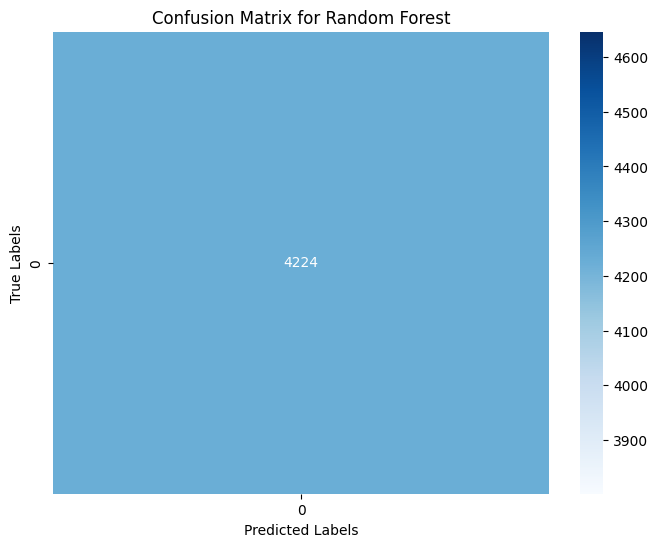

In [76]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(RandomForestModelConfusionMatrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [89]:
# Training and Fitting a IsolationForest Model
IsolationForestModel = IsolationForest()
IsolationForestModel.fit(ScaledCombinedFeatures)

IsolationForest()

In [90]:
# Getting Anamoly Scores
AnomalyScores = IsolationForestModel.decision_function(ScaledCombinedFeatures)

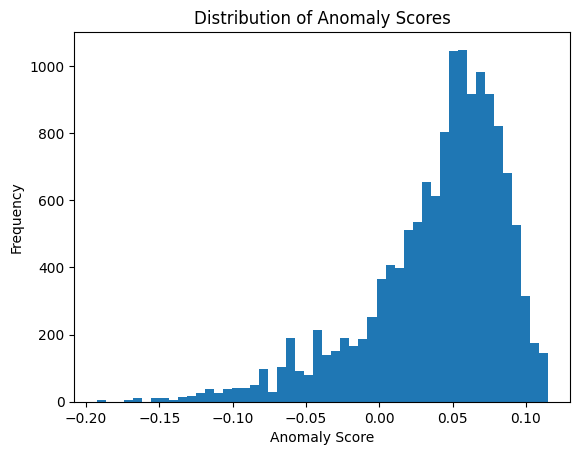

In [91]:
# Visualising anomaly scores
plt.hist(AnomalyScores, bins=50)
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.title("Distribution of Anomaly Scores")
plt.show()